In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import abc
import pymc3 as pm
import theano

In [3]:
import warnings
warnings.filterwarnings('ignore', 'Argument backend_kwargs has not effect in matplotlib.*', UserWarning)

# graph nearest neighbors

In [3]:
df = pd.read_csv('data/naive repertoire SIINFEKL APL landscape data V2.csv')
df

,Unnamed: 0,OT1,B11,B15,B3,F4,E8,B13,H6,G6,...,B5,G2,B7,E4,B14,E9,B10,B16,B2,B6
0,AIINFEKL,8.78,12.00,39.00,2.97,0.31,3.75,3.43,3.12,0.84,...,0.55,1.11,0.54,0.28,0.11,0.55,0.16,2.02,2.93,1.64
1,CIINFEKL,4.60,2.81,26.57,2.55,0.29,1.57,0.26,1.06,0.65,...,0.34,0.86,0.59,0.31,0.16,0.56,0.35,2.06,0.73,1.56
2,DIINFEKL,21.17,9.85,41.33,2.87,0.22,4.23,0.46,8.59,0.51,...,0.59,1.06,0.51,0.32,0.16,0.23,0.30,1.70,2.74,1.68
3,EIINFEKL,2.87,4.79,34.94,2.51,0.33,1.14,0.46,3.98,0.31,...,0.34,1.01,0.43,0.23,0.10,0.38,0.28,1.66,0.73,1.67
4,FIINFEKL,2.90,0.43,6.64,2.82,0.40,1.63,0.10,1.55,0.58,...,0.47,1.07,0.27,0.28,0.35,0.42,0.22,1.77,3.93,1.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,SIINFEKT,31.32,26.57,44.98,4.88,7.07,1.19,1.36,2.92,0.46,...,0.40,0.62,0.21,0.24,0.16,0.11,0.30,1.04,1.22,0.82
149,SIINFEKV,31.17,25.42,41.48,5.48,5.26,1.15,1.61,3.01,0.73,...,0.52,0.87,0.19,0.19,0.00,0.05,0.17,0.92,0.20,0.60
150,SIINFEKW,27.01,22.96,37.07,3.94,5.66,0.87,1.74,1.39,2.49,...,0.56,0.50,0.19,0.25,0.13,0.14,0.27,0.91,1.98,0.90
151,SIINFEKY,32.28,28.98,36.51,4.17,10.34,3.06,3.34,4.09,2.72,...,0.37,0.49,0.25,0.19,0.12,0.22,0.12,1.63,0.98,1.20


In [4]:
ddf = df.rename(columns={'Unnamed: 0': 'epitope'})
ddf.index = ddf.pop('epitope')
ddf

,OT1,B11,B15,B3,F4,E8,B13,H6,G6,F5,...,B5,G2,B7,E4,B14,E9,B10,B16,B2,B6
epitope,,,,,,,,,,,,,,,,,,,,,
AIINFEKL,8.78,12.00,39.00,2.97,0.31,3.75,3.43,3.12,0.84,0.72,...,0.55,1.11,0.54,0.28,0.11,0.55,0.16,2.02,2.93,1.64
CIINFEKL,4.60,2.81,26.57,2.55,0.29,1.57,0.26,1.06,0.65,0.41,...,0.34,0.86,0.59,0.31,0.16,0.56,0.35,2.06,0.73,1.56
DIINFEKL,21.17,9.85,41.33,2.87,0.22,4.23,0.46,8.59,0.51,0.40,...,0.59,1.06,0.51,0.32,0.16,0.23,0.30,1.70,2.74,1.68
EIINFEKL,2.87,4.79,34.94,2.51,0.33,1.14,0.46,3.98,0.31,0.46,...,0.34,1.01,0.43,0.23,0.10,0.38,0.28,1.66,0.73,1.67
FIINFEKL,2.90,0.43,6.64,2.82,0.40,1.63,0.10,1.55,0.58,0.36,...,0.47,1.07,0.27,0.28,0.35,0.42,0.22,1.77,3.93,1.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIINFEKT,31.32,26.57,44.98,4.88,7.07,1.19,1.36,2.92,0.46,0.63,...,0.40,0.62,0.21,0.24,0.16,0.11,0.30,1.04,1.22,0.82
SIINFEKV,31.17,25.42,41.48,5.48,5.26,1.15,1.61,3.01,0.73,0.72,...,0.52,0.87,0.19,0.19,0.00,0.05,0.17,0.92,0.20,0.60
SIINFEKW,27.01,22.96,37.07,3.94,5.66,0.87,1.74,1.39,2.49,0.40,...,0.56,0.50,0.19,0.25,0.13,0.14,0.27,0.91,1.98,0.90


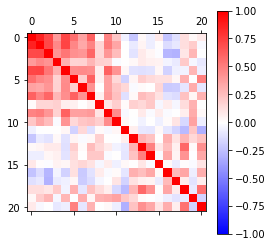

In [5]:
plt.matshow(ddf.corr('spearman'), cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()

In [6]:
import seaborn as sns

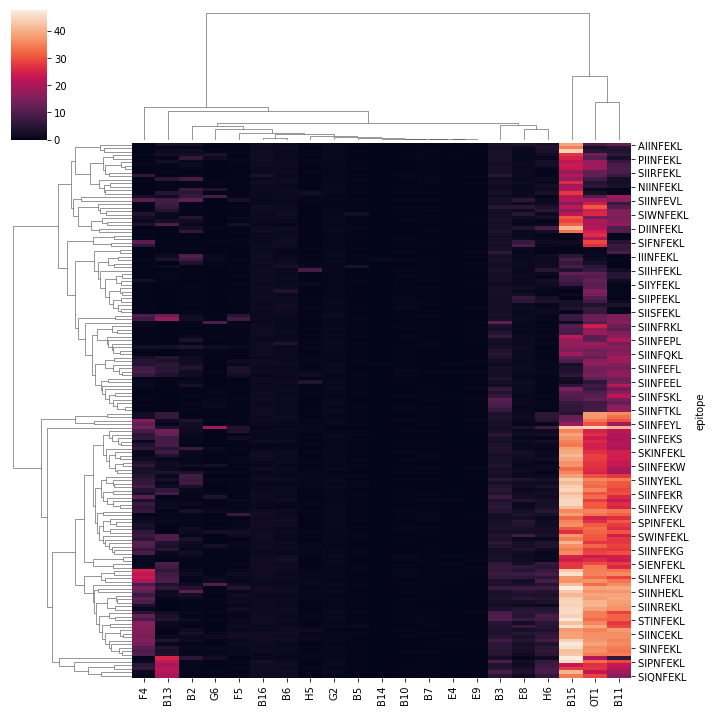

In [7]:
sns.clustermap(ddf)

In [8]:
vecs = []
vec_keys = []
for epitope, *interactions in df.itertuples(False, None):
    epitope = epitope.strip()
    assert len(epitope) == 8
    if epitope == 'SIINFEKL':
        vec_keys.append((-1, ''))
        vecs.append(interactions)
    else:
        for i, (ea, sa) in enumerate(zip(epitope, 'SIINFEKL')):
            if ea != sa:
                key = i, ea
                assert key not in vec_keys
                vec_keys.append(key)
                vecs.append(interactions)
vecs = np.array(vecs)

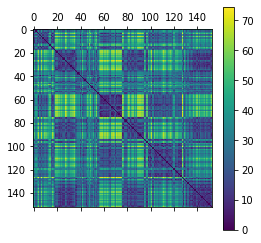

In [9]:
dists = np.zeros((len(vecs), len(vecs)))
for i in range(vecs.shape[0]):
    for j in range(vecs.shape[0]):
        dists[i, j] = np.sqrt(np.sum((vecs[i] - vecs[j])**2))
plt.matshow(dists)
plt.colorbar()

In [10]:
from sklearn.manifold import TSNE

In [11]:
xt = TSNE().fit_transform(vecs)

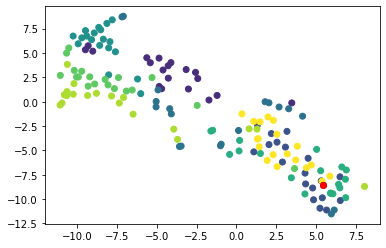

In [12]:
plt.scatter(*xt.T, c=[v[0] for v in vec_keys])
plt.scatter(*xt[-1], c='r')

In [13]:
from sklearn.manifold import MDS

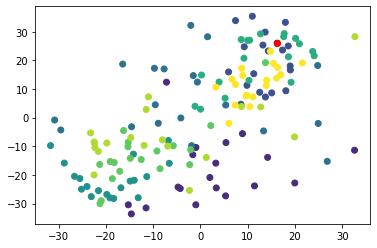

In [14]:
xt = MDS().fit_transform(vecs)
plt.scatter(*xt.T, c=[v[0] for v in vec_keys])
plt.scatter(*xt[-1], c='r')

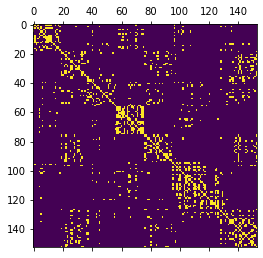

In [15]:
topn = 10
adj = []
for i in range(len(dists)):
    thr = sorted(dists[i])[topn]
    assert np.sum(dists[i] <= thr) == topn + 1
    adj.append(dists[i] <= thr)
adj = np.array(adj, dtype=np.int64)
plt.matshow(adj)

In [16]:
with open('/tmp/ns.csv', 'w') as f:
    f.write('Id,Label,Position,Amino,Mean,Std\n')
    for i in range(len(adj)):
        p1, a1 = vec_keys[i]
        acs = vecs[i]
        f.write(f'{p1}{a1},{p1}{a1},{p1},{a1},{acs.mean()},{acs.std()}\n')

In [17]:
edges = []
with open('/tmp/gr.csv', 'w') as f:
    f.write('Source,Target,Weight\n')
    for i in range(len(adj)):
        for j in range(i,len(adj)):
            p1, a1 = vec_keys[i]
            p2, a2 = vec_keys[j]
            if i != j and adj[i, j] > 0.5:
                f.write(f'{p1}{a1},{p2}{a2},{1/dists[i,j]}\n')
                edges.append((i, j))

In [18]:
import networkx as nx

def make_graph(directed: bool):
    graph = nx.DiGraph() if directed else nx.Graph()

    for i, (p, a) in enumerate(vec_keys):
        graph.add_node(f'{p}{a}', pos=p, amino=a)

    for i in range(len(dists)):
        for j in range(i + 1, len(dists)):
            p1, a1 = vec_keys[i]
            p2, a2 = vec_keys[j]
            #graph.add_edge(f'{p1}{a1}', f'{p2}{a2}', weight=dists[i,j])
            if adj[i,j] > 0.5:
                graph.add_edge(f'{p1}{a1}', f'{p2}{a2}', weight=1 / dists[i,j])
                if not directed:
                    graph.add_edge(f'{p2}{a2}', f'{p1}{a1}', weight=1 / dists[i,j])
    return graph


graph = make_graph(directed=False)

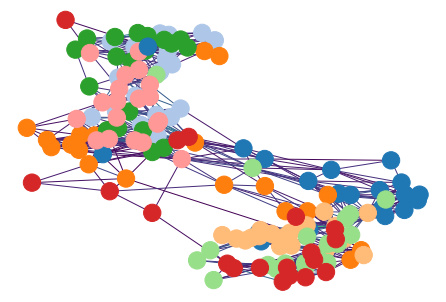

In [19]:
es = graph.edges()
ns = graph.nodes()
cm = plt.get_cmap('tab20')
nx.draw(
    graph,
    pos=nx.spring_layout(graph),
    edge_color=[es[e]['weight'] for e in es],
    node_color=[cm(ns[n]['pos']) for n in ns],
)

In [20]:
activations = pd.DataFrame({
    'mean': [np.mean(vecs[i]) for i in range(len(vecs))],
    'std': [np.std(vecs[i]) for i in range(len(vecs))],
    'pos': [p for p, _ in vec_keys],
    'amino': [a for _, a in vec_keys],
}, index=[f'{p}{a}' for p, a in vec_keys])

In [21]:
cents = pd.DataFrame({
    'eigen': pd.Series(nx.eigenvector_centrality(graph, max_iter=1000, tol=1e-04)),
    'between': pd.Series(nx.betweenness_centrality(graph)),
}).merge(activations, left_index=True, right_index=True)

In [22]:
cents.corr('spearman')

,eigen,between,mean,std,pos
eigen,1.000000,0.100754,0.817424,0.852603,-0.066558
between,0.100754,1.000000,-0.088451,-0.056195,0.129467
mean,0.817424,-0.088451,1.000000,0.968217,0.034346
std,0.852603,-0.056195,0.968217,1.000000,-0.016629
pos,-0.066558,0.129467,0.034346,-0.016629,1.000000


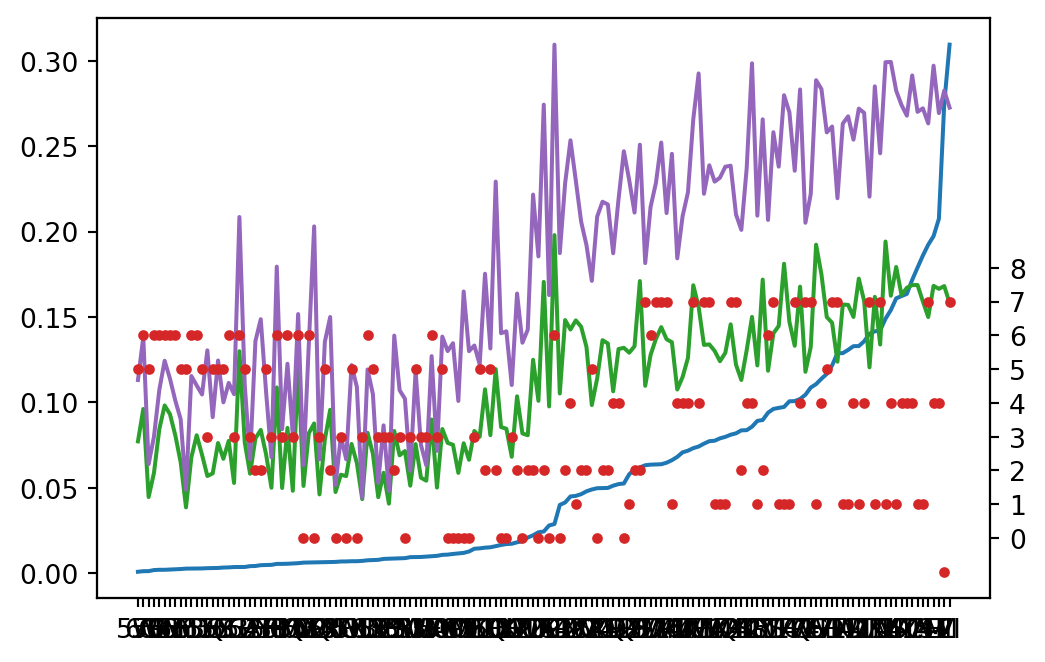

In [23]:
plt.rcParams['figure.dpi'] = 192

mm = 'eigen'
cc = cents.sort_values(mm)
plt.plot(cc[mm])
#plt.plot(cc['between'])
ax2 = plt.twinx()
ax2.plot(cc['mean'], c='C2')
ax2.plot(cc['std'], 'C4')
ax2.plot(cc['pos'], 'C3.')
ax2.set_yticks(list(range(9)));

In [24]:
cc.tail(20)

,eigen,between,mean,std,pos,amino
1D,0.130703,0.011227,6.902381,12.482726,1,D
4L,0.132877,0.059310,6.543333,11.792790,4,L
1T,0.132952,0.008587,7.677619,12.710937,1,T
4I,0.135735,0.001664,7.015238,12.585552,4,I
7K,0.140194,0.043303,5.051429,10.104281,7,K
1M,0.141542,0.002841,7.138571,13.370424,1,M
7V,0.142103,0.059507,5.726667,11.389257,7,V
1L,0.148977,0.000859,8.777143,14.085831,1,L
4S,0.154024,0.000703,7.172381,14.093257,4,S
1A,0.160882,0.000191,8.022857,13.241809,1,A


In [25]:
from scipy.stats import wasserstein_distance

In [26]:
epi_ws = np.array([
    [
        wasserstein_distance(ddf.iloc[i].values, ddf.iloc[j].values)
        for j in range(len(ddf))
    ]
    for i in range(len(ddf))
])

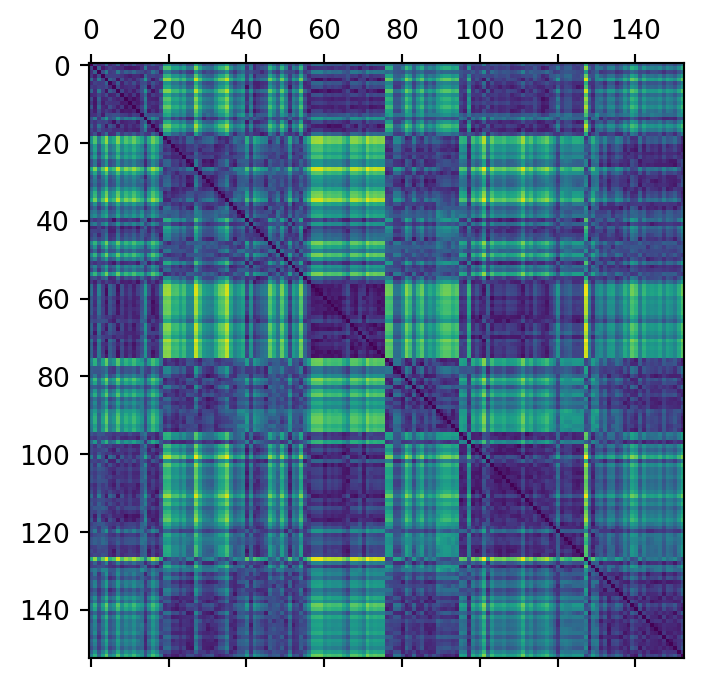

In [27]:
plt.matshow(epi_ws)  # quite similar to L2

In [28]:
tcr_ws = np.array([
    [
        wasserstein_distance(ddf[i].values, ddf[j].values)
        for j in ddf
    ]
    for i in ddf
])

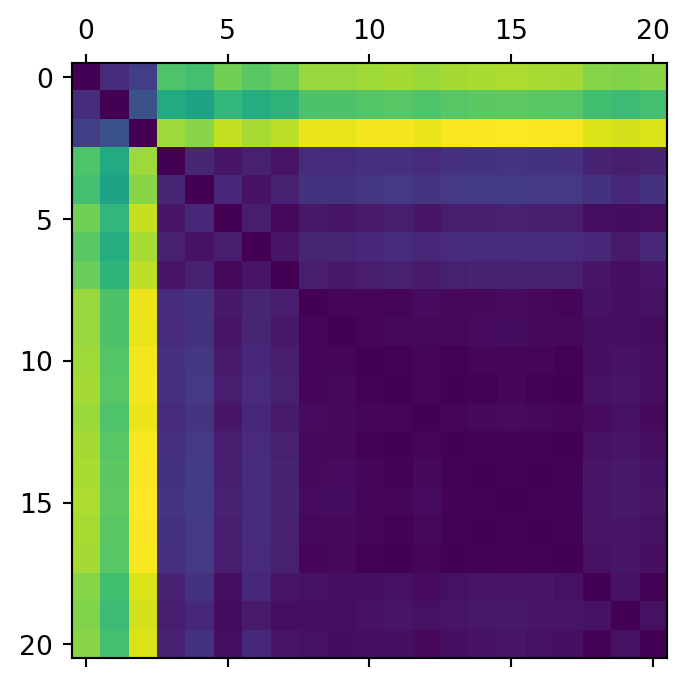

In [29]:
plt.matshow(tcr_ws)

# old stuff

In [30]:
df = pd.read_excel('data/SIINFEKL TCRs N4 Y3 T4 reactivity.xlsx')
df = df.T.drop(columns=[2, 3])[1:]
df.columns = [
    'CDR3 alpha', 'CDR3 beta',
    'N4 repl1', 'N4 repl2',
    'Y3 repl1', 'Y3 repl2',
    'T4 repl1', 'T4 repl2'
]
df.head()

,CDR3 alpha,CDR3 beta,N4 repl1,N4 repl2,Y3 repl1,Y3 repl2,T4 repl1,T4 repl2
B2,CAVSQMSNYNVLYF,CASGTGGSGQLYF,3.217247,3.698176,1.293532,1.094527,2.139303,2.487562
B3,CAAGNTGYQNFYF,CASSSLQGARNQAPLF,54.617117,53.265766,1.61036,1.204955,3.130631,3.637387
B5,CAVSLYQGGRALIF,CASSFAGGARAEQFF,1.237785,1.248643,0.803474,0.749186,2.366992,2.899023
B6,CALSLGNAGAKLTF,CASSDGMISSSYEQYF,1.742424,1.55303,1.022727,1.161616,2.992424,3.459596
B7,CAMERDMGYKLTF,CASGDPGDQDTQYF,1.517672,1.756757,1.288981,1.216216,3.877339,4.126819


In [31]:
sss = '''Ed16-1_a        CAVS----GSNNRIFF
B11_a           CAA-----GSNYQLIW
OT1_a           CAA-----SDNYQLIW
B15_a           CAASA---ASNNRLTL
Ed39_a          CATM----SNYNVLYF
F4_a            CAAM----SNYNVLYF
B2_a            CAVSQM--SNYNVLYF
Ed46_b          CASS----PRHSDYTF
G2_b            CASS----GTDTEVFF
B15_b           CASSR---RADAEQFF
B5_b            CASSFAG-GARAEQFF
B13_b           CASSD---GTGHEQYF
Ed39_b          CGAR----DGSYEQYF
Ed23_b          CAWSPR--QSSYEQYF
Ed45_b          CASAR---GFQDTQYF
B6_b            CASSDGMISSSYEQYF
Ed10_b          CAW-----SPGYEQYF
B7_b            CASGDP--GDQDTQYF
OT1_b           CASS----RANYEQYF
H5_b            CASGD---RERDTQYF
E4_b            CASSIW--GDSYEQYF
F5_b            CAS-----GDASEQYF
Ed31_b          CAS-----RSAGEQYF
Ed5_b           CASSRRLGASQNTLYF
Ed33_b          CASSL---YTNQAPLF
F4_b            CASSA---RQNSPLYF
B16_b           CASSD---GTNQAPLF
B3_b            CASSSLQGARNQAPLF
E9_b            CASSRD--SNNQAPLF
B10_b           CASSLRG-GNNQAPLF
G6_b            CASSRQGGDNNQAPLF
Ed10_a          CAVRG---TGYQNFYF
B3_a            CAAGN---TGYQNFYF
B16_a           CAARG---SALGRLHF
Ed16-30_b       CAG-----RDTGQLYF
Ed9_b           CASS----PRQSDYTF
Ed21_b          CASS----PRQTDYTF
Ed16-1_b        CAS-----RTGTDYTF
B14_b           CASSMG--QGASDYTF
H6_b            CASSGT--AANSDYTF
Ed8_b           CASS----PRASNYTF
Ed28_b          CASS----PRASDYTF
B11_b           CASSGG--TGRNTLYF
Ed40_b          CASSG---ASAETLYF
Ed23_a          CAVRG---FWTNKVVF
E8_b            CASGDWG-AGTGQLYF
B2_b            CASGT---GGSGQLYF
Ed40_a          CALGDGY-TGNYKYVF
Ed45_a          CAVSG---TNAYKVIF
B13_a           CAMREG--TGGYKVVF
Ed46_a          CAVGR---TGGYKVVF
Ed9_a           CAVSI---TGGYKVVF
Ed21_a          CAVSM---SGGYKVVF
E9_a            CAVSRS--SGSWQLIF
Ed31_a          CALEG---NYAQGLTF
B5_a            CAVSLY--QGGRALIF
G2_a            CAVRTN--QGGRALIF
Ed8_a           CAVSP---GSGGKLTL
Ed28_a          CAVSP---GSGGKLTL
Ed5_a           CALGS---YNQGKLIF
H6_a            CAMRD---YNQGKLIF
E4_a            CAVSAGQ-GGSAKLIF
Ed16-30_a       CAVSEP--SSGQKLVF
H5_a            CAVSNYG-SSGNKLIF
B7_a            CAMER---DMGYKLTF
B14_a           CAVSARG-NMGYKLTF
F5_a            CALSPS--NMGYKLTF
E8_a            CALN----TNTGKLTF
B10_a           CAPG----GSNAKLTF
G6_a            CAVTPG--GSNAKLTF
B6_a            CALSLG--NAGAKLTF
Ed33_a          CATDHN--NAGAKLTF'''

In [32]:
alpha_aligned = pd.DataFrame([
    (row.split()[0].split('_')[0], row.split()[1])
    for row in sss.split('\n')
    if '_a' in row
], columns=['idx', 'aligned'])
beta_aligned = pd.DataFrame([
    (row.split()[0].split('_')[0], row.split()[1])
    for row in sss.split('\n')
    if '_b' in row
], columns=['idx', 'aligned'])

In [33]:
df = df.merge(
    alpha_aligned, left_index=True, right_on='idx'
).merge(
    beta_aligned, left_on='idx', right_on='idx', suffixes=('_alpha', '_beta')
).drop(columns='idx')

df.to_csv('data/reactivity.csv', index=False)

In [34]:
# LOG TRANSFORMATION OF AFFINITY
df.iloc[:, 2:8] = np.log(df.iloc[:, 2:8].values.astype(np.float32))
df = df.replace([np.inf, -np.inf], np.nan).dropna()
df.head()

,CDR3 alpha,CDR3 beta,N4 repl1,N4 repl2,Y3 repl1,Y3 repl2,T4 repl1,T4 repl2,aligned_alpha,aligned_beta
0,CAVSQMSNYNVLYF,CASGTGGSGQLYF,1.168526,1.307840,0.257377,0.090323,0.760480,0.911303,CAVSQM--SNYNVLYF,CASGT---GGSGQLYF
1,CAAGNTGYQNFYF,CASSSLQGARNQAPLF,4.000347,3.975294,0.476458,0.186442,1.141235,1.291266,CAAGN---TGYQNFYF,CASSSLQGARNQAPLF
2,CAVSLYQGGRALIF,CASSFAGGARAEQFF,0.213323,0.222057,-0.218810,-0.288768,0.861620,1.064374,CAVSLY--QGGRALIF,CASSFAG-GARAEQFF
3,CALSLGNAGAKLTF,CASSDGMISSSYEQYF,0.555277,0.440208,0.022473,0.149812,1.096084,1.241152,CALSLG--NAGAKLTF,CASSDGMISSSYEQYF
4,CAMERDMGYKLTF,CASGDPGDQDTQYF,0.417177,0.563469,0.253852,0.195745,1.355149,1.417507,CAMER---DMGYKLTF,CASGDP--GDQDTQYF


/home/edo/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


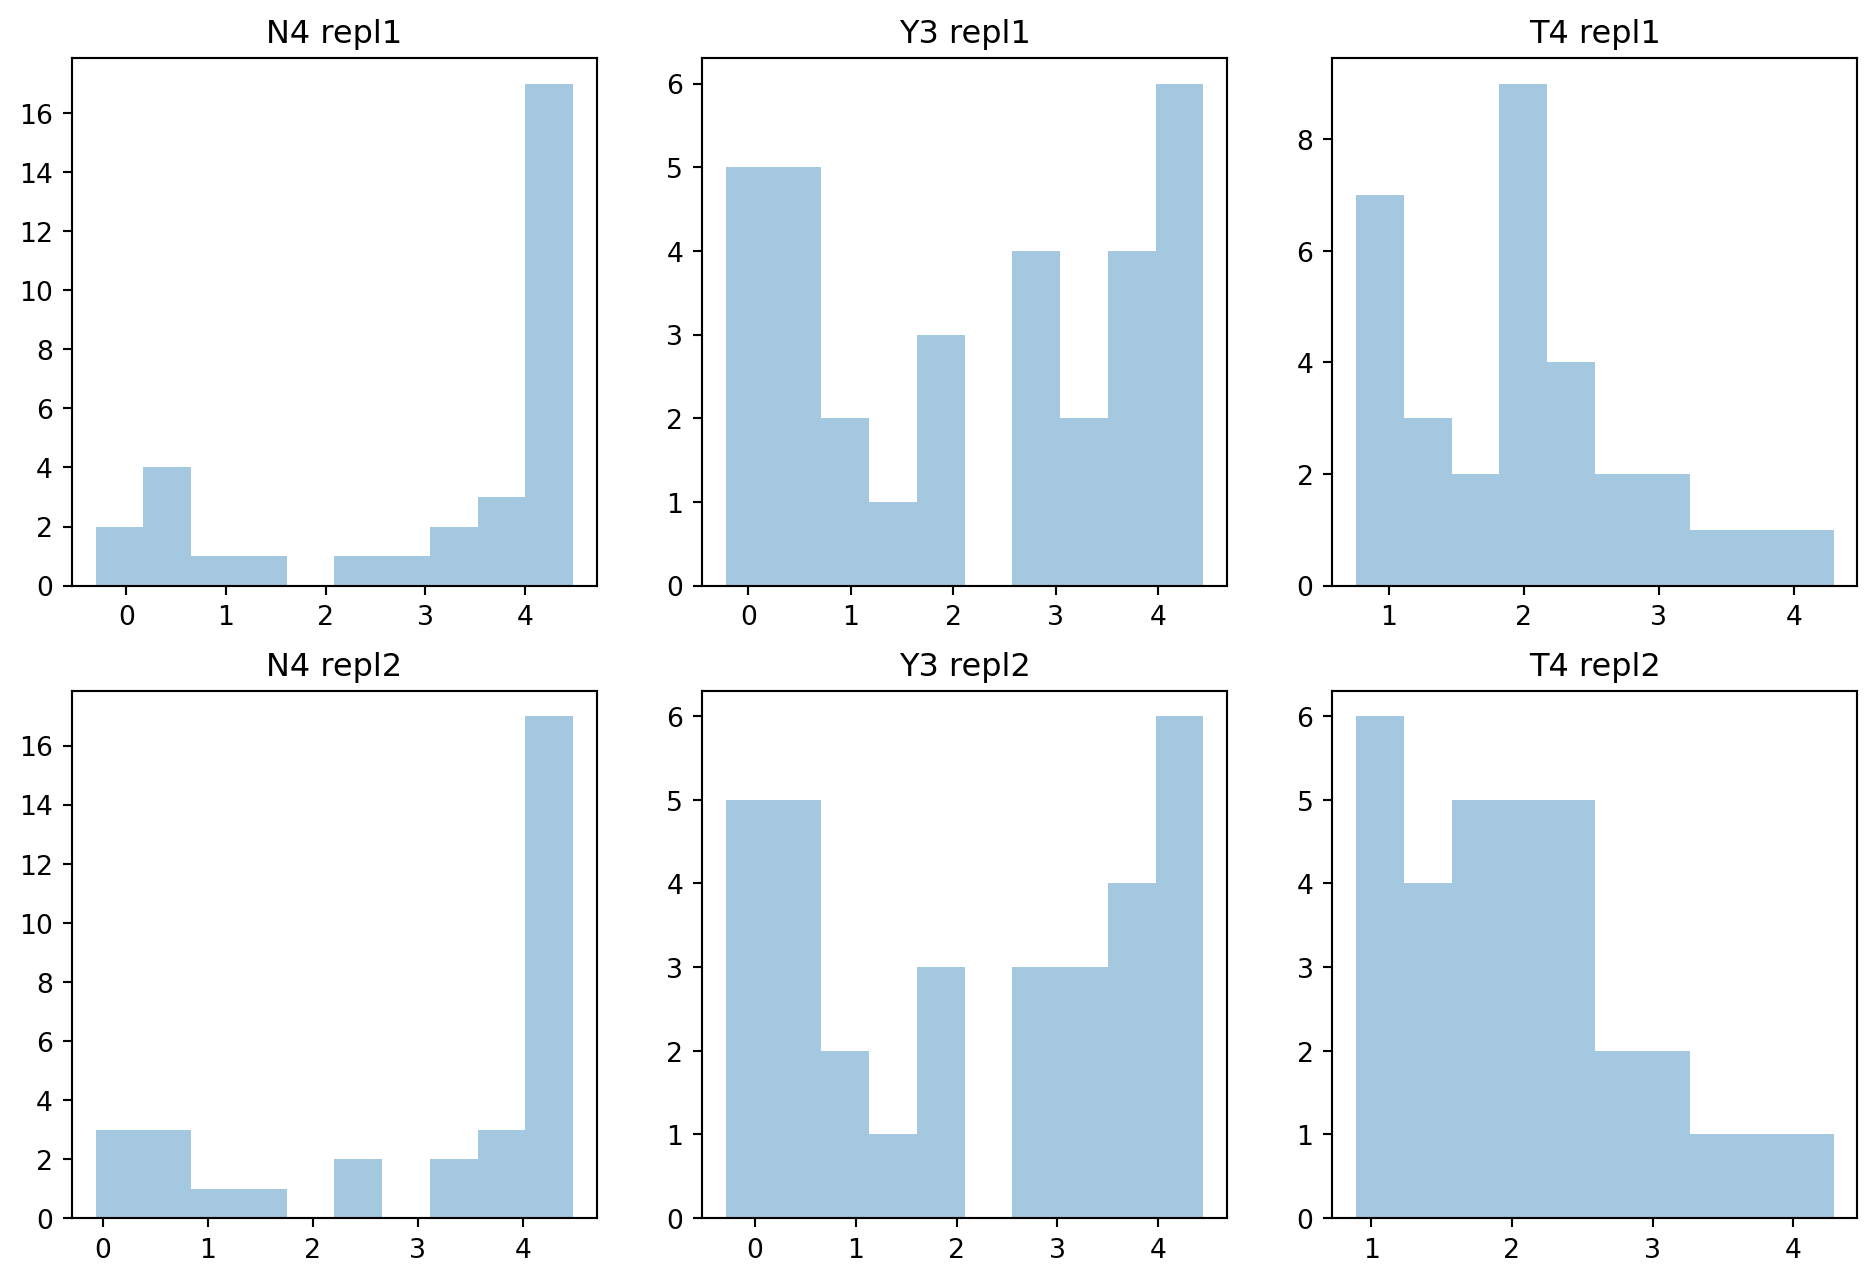

In [35]:
plt.figure(figsize=(12, 8))
for i, x in enumerate(df.iloc[:, 2:8].T.values):
    plt.subplot(2, 3, [0, 3, 1, 4, 2, 5][i] + 1)
    sns.distplot(x, kde=False, bins=10)
    plt.title(df.columns[2 + i])
plt.show()

In [36]:
df_n4 = df[
    ['CDR3 alpha', 'CDR3 beta', 'aligned_alpha', 'aligned_beta', 'N4 repl1', 'N4 repl2']
].rename(columns={'N4 repl1': 'repl1', 'N4 repl2': 'repl2'})
df_n4['n4i'] = 1.
df_n4['y3i'] = 0.
df_n4['t4i'] = 0.

df_y3 = df[
    ['CDR3 alpha', 'CDR3 beta', 'aligned_alpha', 'aligned_beta', 'Y3 repl1', 'Y3 repl2']
].rename(columns={'Y3 repl1': 'repl1', 'Y3 repl2': 'repl2'})
df_y3['n4i'] = 0.
df_y3['y3i'] = 1.
df_y3['t4i'] = 0.

df_t4 = df[
    ['CDR3 alpha', 'CDR3 beta', 'aligned_alpha', 'aligned_beta', 'T4 repl1', 'T4 repl2']
].rename(columns={'T4 repl1': 'repl1', 'T4 repl2': 'repl2'})
df_t4['n4i'] = 0.
df_t4['y3i'] = 0.
df_t4['t4i'] = 1.

df_long = pd.concat([df_n4, df_y3, df_t4]).reset_index(drop=True)
r1 = df_long[[
    'CDR3 alpha', 'CDR3 beta', 'aligned_alpha', 'aligned_beta', 'repl1', 'n4i', 'y3i', 't4i'
]].rename(columns={'repl1': 'y'})
r2 = df_long[[
    'CDR3 alpha', 'CDR3 beta', 'aligned_alpha', 'aligned_beta', 'repl2', 'n4i', 'y3i', 't4i'
]].rename(columns={'repl2': 'y'})
df_train = pd.concat([r1, r2])
df_train

,CDR3 alpha,CDR3 beta,aligned_alpha,aligned_beta,y,n4i,y3i,t4i
0,CAVSQMSNYNVLYF,CASGTGGSGQLYF,CAVSQM--SNYNVLYF,CASGT---GGSGQLYF,1.168526,1.0,0.0,0.0
1,CAAGNTGYQNFYF,CASSSLQGARNQAPLF,CAAGN---TGYQNFYF,CASSSLQGARNQAPLF,4.000347,1.0,0.0,0.0
2,CAVSLYQGGRALIF,CASSFAGGARAEQFF,CAVSLY--QGGRALIF,CASSFAG-GARAEQFF,0.213323,1.0,0.0,0.0
3,CALSLGNAGAKLTF,CASSDGMISSSYEQYF,CALSLG--NAGAKLTF,CASSDGMISSSYEQYF,0.555277,1.0,0.0,0.0
4,CAMERDMGYKLTF,CASGDPGDQDTQYF,CAMER---DMGYKLTF,CASGDP--GDQDTQYF,0.417177,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
91,CAVRTNQGGRALIF,CASSGTDTEVFF,CAVRTN--QGGRALIF,CASS----GTDTEVFF,1.480013,0.0,0.0,1.0
92,CAVTPGGSNAKLTF,CASSRQGGDNNQAPLF,CAVTPG--GSNAKLTF,CASSRQGGDNNQAPLF,0.994977,0.0,0.0,1.0
93,CAVSNYGSSGNKLIF,CASGDRERDTQYF,CAVSNYG-SSGNKLIF,CASGD---RERDTQYF,1.801302,0.0,0.0,1.0
94,CAMRDYNQGKLIF,CASSGTAANSDYTF,CAMRD---YNQGKLIF,CASSGT--AANSDYTF,1.740317,0.0,0.0,1.0


# predict tcr affinity

In [37]:
AMINOS = ['-', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
AMINO_IDX = {a: i for i, a in enumerate(AMINOS)}

def encoder(pad_to):
    def encode(seq):
        seq = seq.strip().upper()
        assert len(seq) <= pad_to
        encoded = np.zeros((pad_to, len(AMINOS)))
        for i, a in enumerate(seq):
            encoded[i, AMINO_IDX[seq[i]]] = 1
        return encoded
    return encode


encoded_alpha = theano.shared(np.array(df_train['CDR3 alpha'].apply(encoder(16)).tolist()))
encoded_beta = theano.shared(np.array(df_train['CDR3 beta'].apply(encoder(16)).tolist()))

encoded_alpha_aligned = theano.shared(np.array(df_train['aligned_alpha'].apply(encoder(16)).tolist()))
encoded_beta_aligned = theano.shared(np.array(df_train['aligned_beta'].apply(encoder(16)).tolist()))

In [38]:
encoded_alpha.shape.eval(), encoded_beta.shape.eval()

(array([192,  16,  21]), array([192,  16,  21]))

In [39]:
encoded_alpha_aligned.shape.eval(), encoded_beta_aligned.shape.eval()

(array([192,  16,  21]), array([192,  16,  21]))

/home/edo/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

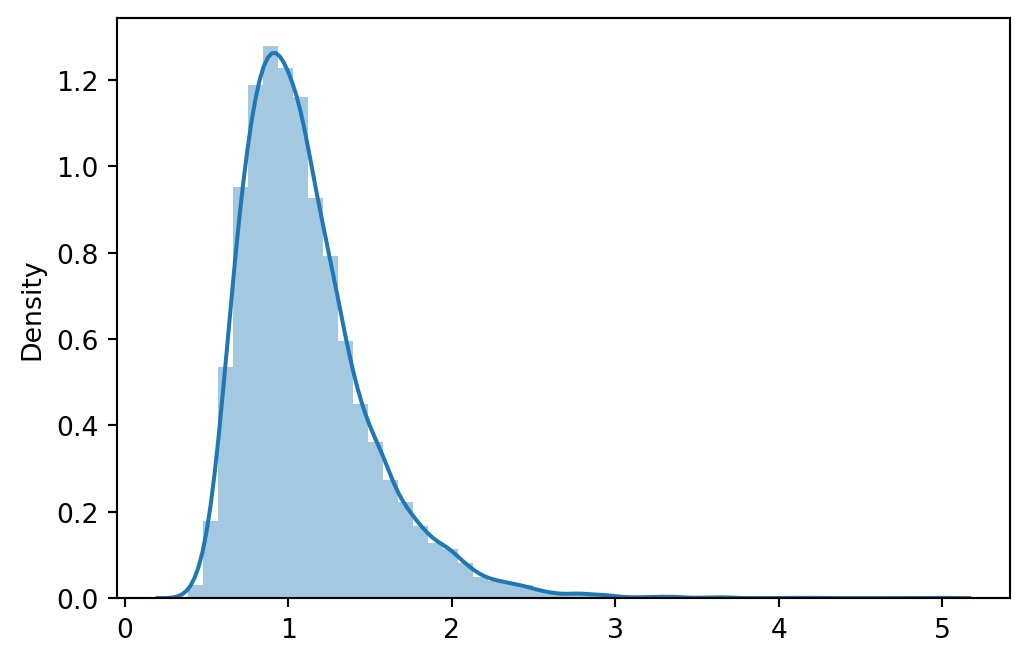

In [40]:
sns.distplot(pm.InverseGamma.dist(10, 10).random(size=10000))

/home/edo/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

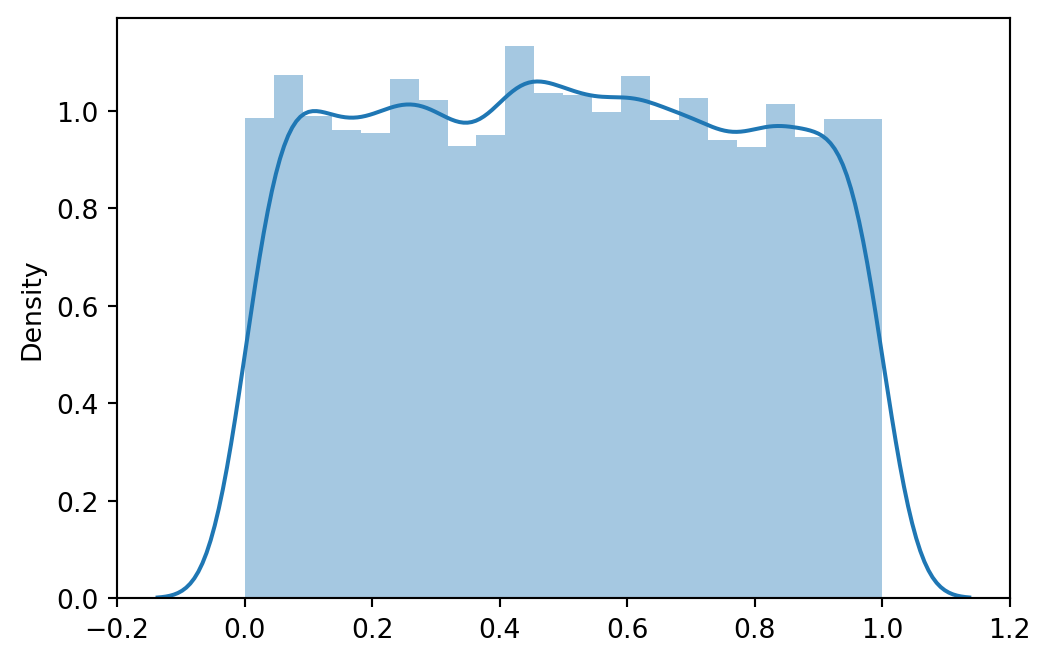

In [41]:
sns.distplot(pm.Beta.dist(1, 1).random(size=10000))

/home/edo/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

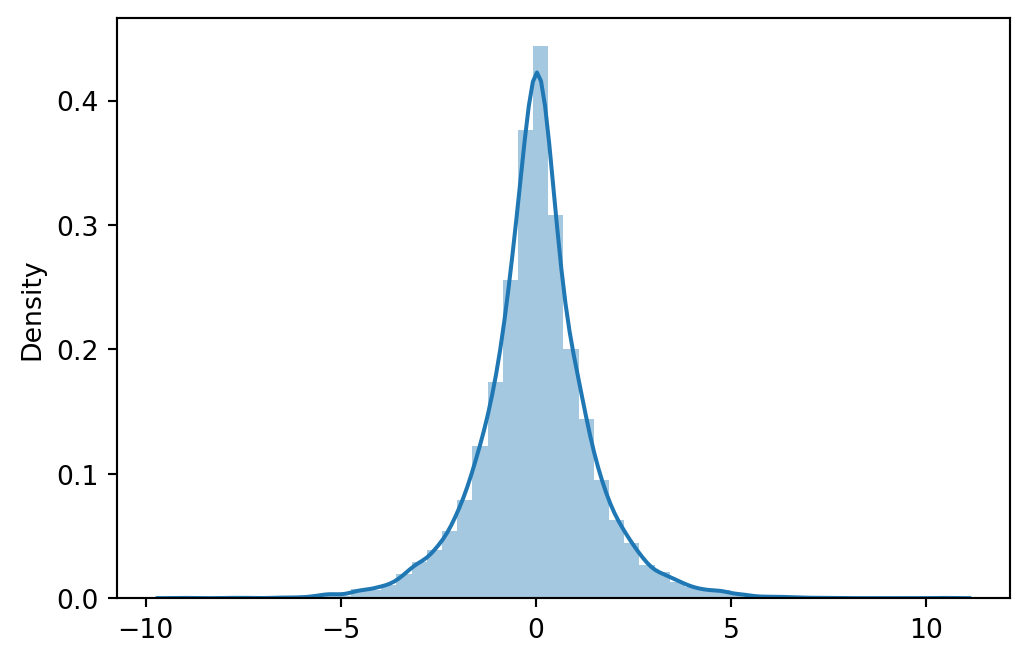

In [42]:
sns.distplot(pm.Laplace.dist(0, 1).random(size=10000))

/home/edo/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

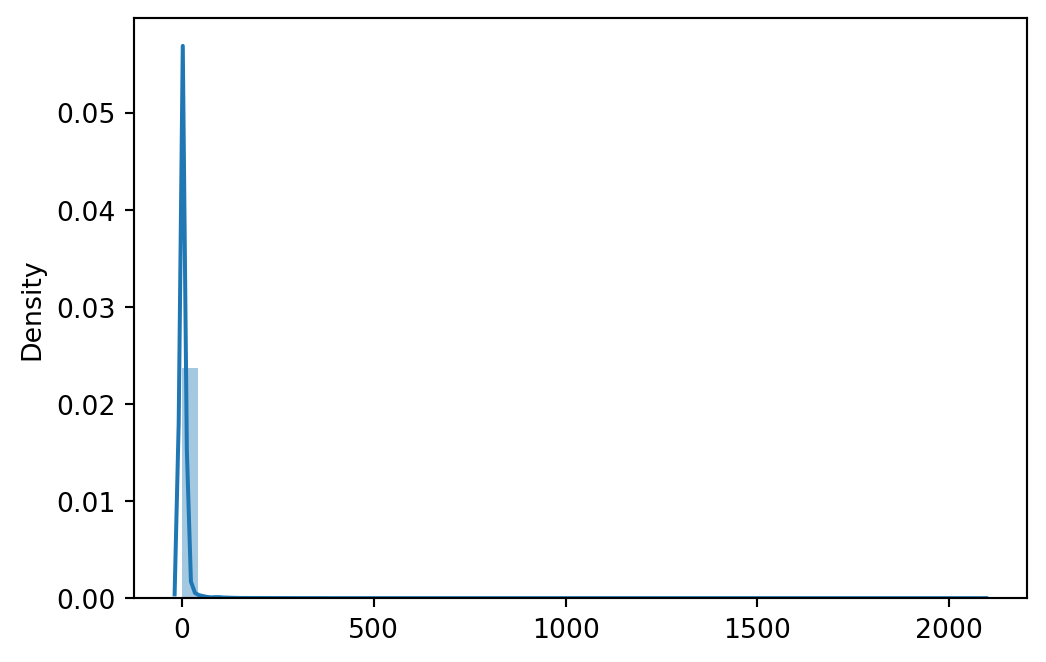

In [43]:
sns.distplot(pm.HalfCauchy.dist(1).random(size=10000))

## models

$$
\mu(y)=\underbrace{\sum_p I^\alpha_p\cdot\left(\sum_a E^\alpha_{ap}\cdot x^\alpha_{ap}\right)}_{\alpha-\text{chain}} + \underbrace{\sum_p I^\beta_p\cdot\left(\sum_a E^\beta_{ap}\cdot x^\beta_{ap}\right)}_{\beta-\text{chain}}+\delta_t
$$

Where:

\begin{align*}
& x^\alpha_{ap} & \text{One iff amino acid $a$ is in position $p$ of the $\alpha$ chain} \\
y&\sim\mathcal{N}(\mu(y), \sigma^y) & \text{Prediction} \\
E^\alpha_{ap} &\sim \mathcal{N}(0, \sigma^{\alpha}) &\text{Effect of amino acid $a$ in position $p$ of the $\alpha$ chain} \\
E^\beta_{ap} &\sim \mathcal{N}(0, \sigma^{\beta}) &\text{Effect of amino acid $a$ in position $p$ of the $\beta$ chain} \\
& I^\alpha_p & \text{Position parsity; either Bernoulli, Laplace, or half Cauchy} \\
\delta_t&\sim\mathcal{N}(0, \sigma^{\delta}) & \text{Intercept for type $t$, or zero if $t=N4$} \\
\sigma^{y}&\sim\Gamma^{-1}(10, 10) & \text{Prior for standard deviation of observations} \\
\sigma^{\alpha}&\sim\Gamma^{-1}(10, 10) & \text{Prior for standard deviation of $\alpha$ chain} \\
\sigma^{\beta}&\sim\Gamma^{-1}(10, 10) & \text{Prior for standard deviation of $\alpha$ chain} \\
\sigma^{\delta}&\sim\Gamma^{-1}(10, 10) & \text{Prior for standard deviation of intercept} \\
\end{align*}

and the sparsities $I^\alpha_p$ and $I^\beta_p$ can be one of $\mathcal{Ber}(\mathcal{Beta}(1, 1))$, half Cauchy or Laplace.

In [44]:
pm.__version__

'3.8'

In [45]:
class Sparsity(abc.ABC):
    @abc.abstractmethod
    def get_sparsity_variable(self, name):
        pass
    
    def apply_sparsity(self, positions, name):
        importance = self.get_sparsity_variable(name)
        return positions * importance


class NoSparsity(Sparsity):
    def get_sparsity_variable(self, name):
        return 1.


class BernoulliSparsity(Sparsity):
    def get_sparsity_variable(self, name):
        prior = pm.Beta(f'{name}p', 1, 1)
        return pm.Bernoulli(name, p=prior, shape=(16,))

    
class LaplaceSparsity(Sparsity):
    def get_sparsity_variable(self, name):
        return pm.Laplace(name, mu=0, b=1, shape=(16,))

    
class CauchySparsity(Sparsity):
    def get_sparsity_variable(self, name):
        return pm.HalfCauchy(name, beta=1, shape=(16,))


class EntangledPositionAminoacidEffects:
    def __init__(self, sparsity):
        self._sparsity = sparsity

    def get_tcr_contribution(self, alpha_chains, beta_chains):
        alpha_pos_effects = pm.Normal('ap', mu=0, sd=pm.InverseGamma('ap_sd', 10, 10), shape=(21, 16))
        beta_pos_effects = pm.Normal('bp', mu=0, sd=pm.InverseGamma('bp_sd', 10, 10), shape=(21, 16))

        alpha_pos_effects = self._sparsity.apply_sparsity(alpha_pos_effects, 'ai')
        beta_pos_effects = self._sparsity.apply_sparsity(beta_pos_effects,'bi')
        
        amino_effects = pm.Normal('a', mu=0, sd=pm.InverseGamma('a_sd', 10, 10), shape=(21, 1))
        
        alpha_contribution = alpha_chains.dot(alpha_pos_effects)
        beta_contribution = beta_chains.dot(beta_pos_effects)
        
        tcr_contribution = pm.Deterministic('tcr', pm.math.sum(
            alpha_contribution + beta_contribution, axis=(1, 2)
        ))
        
        return tcr_contribution


class TcrAffinityModel:
    def __init__(self, name, tcr_model, prefer_persisted=False):
        self._name = name
        self._tcr_model = tcr_model
        self._trace = None
        self._prefer_persisted = prefer_persisted

    def _build_model(self, alpha_chains, beta_chains, df):
        self._model = pm.Model()
        with self._model:
            tcr_contribution = self._tcr_model.get_tcr_contribution(alpha_chains, beta_chains)

            # intercepts
            intercepts = pm.Normal('y3i', mu=0, sd=pm.InverseGamma('isd', 10, 10), shape=(2, 1))
            tcr_contribution += pm.math.dot(df[['y3i', 't4i']].values, intercepts)

            # likelihood
            tc = pm.math.stack([tcr_contribution, tcr_contribution], axis=1)
            outcome = pm.Normal('y', mu=tc, sd=pm.InverseGamma('osd', 10, 10),
                                observed=df['y'].values)

        # we do it at the end so that the name won't be in the trace keys
        self._model.name = self._name

    def fit(self, alpha_chains, beta_chains, df):
        if self._prefer_persisted and os.path.exists(f'{self._name}-state.pkl'):
            instance = TcrAffinityModel.load_from_disk(self._name)
            self._model = instance._model
            self._trace = instance._trace
            self._tcr_model = instance._tcr_model
            print('loaded from disk')
        else:
            self._build_model(alpha_chains, beta_chains, df)
            with self._model:
                try:
                    self._trace = pm.sample(
                        tune=1000, draws=500,
                        nuts={'target_accept': 0.98, 'max_treedepth': 25}
                    )
                except TypeError:
                    self._trace = pm.sample(
                        tune=1000, draws=500,
                        target_accept=0.98, max_treedepth=25
                    )
            if self._prefer_persisted:
                self.persist_to_disk()
        return self

    def persist_to_disk(self):
        with open(f'{self._name}-state.pkl', 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_from_disk(name):
        with open(f'{name}-state.pkl', 'rb') as f:
            return pickle.load(f)

In [46]:
cauchy_model = TcrAffinityModel(
    'cauchy_model',
    EntangledPositionAminoacidEffects(CauchySparsity()),
).fit(encoded_alpha, encoded_beta, df_train)
pm.traceplot(cauchy_model._trace);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [osd, y3i, isd, a, a_sd, bi, ai, bp, bp_sd, ap, ap_sd]
Sampling 4 chains, 0 divergences:  12%|█▏        | 701/6000 [01:00<07:38, 11.54draws/s]  


RuntimeError: Chain 0 failed.

In [ ]:
cauchy_aligned_model = TcrAffinityModel(
    'cauchy_aligned_model',
    EntangledPositionAminoacidEffects(CauchySparsity()),
).fit(encoded_alpha_aligned, encoded_beta_aligned, df)
pm.traceplot(cauchy_aligned_model._trace);

In [ ]:
bernoulli_model = TcrAffinityModel(
    'bernoulli_model',
    EntangledPositionAminoacidEffects(BernoulliSparsity()),
).fit(encoded_alpha, encoded_beta, df)
pm.traceplot(bernoulli_model._trace);

In [ ]:
bernoulli_aligned_model = TcrAffinityModel(
    'bernoulli_aligned_model',
    EntangledPositionAminoacidEffects(BernoulliSparsity()),
).fit(encoded_alpha_aligned, encoded_beta_aligned, df)
pm.traceplot(bernoulli_aligned_model._trace);

In [ ]:
laplace_model = TcrAffinityModel(
    'laplace_model',
    EntangledPositionAminoacidEffects(LaplaceSparsity())
).fit(encoded_alpha, encoded_beta, df)
pm.traceplot(laplace_model._trace);

In [ ]:
laplace_aligned_model = TcrAffinityModel(
    'laplace_aligned_model',
    EntangledPositionAminoacidEffects(LaplaceSparsity())
).fit(encoded_alpha_aligned, encoded_beta_aligned, df)
pm.traceplot(laplace_aligned_model._trace);

In [ ]:
dependent_model = TcrAffinityModel(
    'dependent_model',
    EntangledPositionAminoacidEffects(NoSparsity())
).fit(encoded_alpha, encoded_beta, df)
pm.traceplot(dependent_model._trace);

In [ ]:
dependent_aligned_model = TcrAffinityModel(
    'dependent_aligned_model',
    EntangledPositionAminoacidEffects(NoSparsity())
).fit(encoded_alpha_aligned, encoded_beta_aligned, df)
pm.traceplot(dependent_aligned_model._trace);

## comparison

In [ ]:
pm.compare({
    dependent_model._model: dependent_model._trace,
    dependent_aligned_model._model: dependent_aligned_model._trace,

    laplace_model._model: laplace_dependent_model._trace,
    laplace_aligned_model._model: laplace_dependent_model._trace,

    cauchy_model._model: cauchy_dependent_model._trace,
    cauchy_aligned_model._model: cauchy_dependent_model._trace,

    bernoulli_model._model: bernoulli_dependent_model._trace,
    bernoulli_aligned_model._model: bernoulli_dependent_model._trace,
}, ic='LOO')

LOO cross-validation is an estimate of the out-of-sample predictive fit. In cross-validation, the data are repeatedly partitioned into training and holdout sets, iteratively fitting the model with the former and evaluating the fit with the holdout data. Vehtari et al. (2016) introduced an efficient computation of LOO from MCMC samples, which are corrected using Pareto-smoothed importance sampling (PSIS) to provide an estimate of point-wise out-of-sample prediction accuracy.

columns:
 - estimated loo
 - estimated effective number of parameters
 - difference from first
 - weight for model averaging
 - standard error for loo computation
 - standard error for loo difference
 - heuristic diagnostics failed?

In [ ]:
pm.compare({
    dependent_model._model: dependent_model._trace,
    laplace_dependent_model._model: laplace_dependent_model._trace,
    informative_bernoulli_dependent_model._model: informative_bernoulli_dependent_model._trace,
    bernoulli_dependent_model._model: bernoulli_dependent_model._trace
}, ic='WAIC')

## predictions

In [ ]:
def plot_predictions(model, trace):
    intercepts = [0, trace['y3i'].mean(), trace['t4i'].mean()]
    plt.figure(figsize=(16, 4))
    plt.suptitle(f'predictions for {model.name}')
    for i, l in enumerate(['N4', 'Y3', 'T4']):
        obs = df[[f'{l} repl1', f'{l} repl2']].mean(axis=1)
        pred = trace['tcr'][::5].mean(axis=0) + intercepts[i]
        mse = np.mean((obs - pred)**2)
        
        plt.subplot(1, 3, i + 1)
        plt.errorbar(
            obs, pred,
            yerr=trace['tcr'][::5].std(axis=0),
            fmt='.'
        )
        plt.ylabel('predicted')
        plt.xlabel('observed')
        plt.plot([0, 5], [0, 5], 'r--')
        plt.title(f'predictions for {l} (MSE: {mse:.3f})')
    plt.show()


plot_predictions(dependent_model._model, dependent_model._trace)
plot_predictions(cauchy_dependent_model._model, cauchy_dependent_model._trace)
plot_predictions(bernoulli_dependent_model._model, bernoulli_dependent_model._trace)
plot_predictions(laplace_dependent_model._model, laplace_dependent_model._trace)

## signal to noise ratio

In [ ]:
def plot_model_snr(model, ax1, ax2, vmin=-0.5, vmax=0.5, cmap='bwr', **imshow_kwargs):
    if 'ai' in model._trace.varnames:
        print(model._model.name, model._trace['ai'].shape)
        a_coef = model._trace['ap'] * model._trace['ai'][:, None, :]
        b_coef = model._trace['bp'] * model._trace['bi'][:, None, :]
    else:
        a_coef, b_coef = model._trace['ap'], model._trace['bp']
        
    a_snr = a_coef.mean(axis=0) / a_coef.std(axis=0)
    b_snr = b_coef.mean(axis=0) / b_coef.std(axis=0)
    
    ax1.imshow(a_snr.T, cmap='bwr', vmin=vmin, vmax=vmax, aspect='auto', **imshow_kwargs)    
    mp2 = ax2.imshow(b_snr.T, cmap='bwr', vmin=vmin, vmax=vmax, aspect='auto', **imshow_kwargs)
    
    return mp2

fig = plt.figure(figsize=(8, 8))
plot_rows = fig.subplots(4, 2)

models = [dependent_model, bernoulli_dependent_model,
          cauchy_dependent_model, laplace_dependent_model]
for i, ((ax1, ax2), model) in enumerate(zip(plot_rows, models)):
    if i == 0:
        ax1.set_title('alpha chain')
        ax2.set_title('beta chain')
    ax1.set_ylabel(model._model.name.replace('_dependent_model', ''))
    mp = plot_model_snr(model, ax1, ax2)

    ax1.set_xticks(range(len(AMINOS)))
    ax1.set_xticklabels(AMINOS)
    ax2.set_xticks(range(len(AMINOS)))
    ax2.set_xticklabels(AMINOS)

plt.colorbar(mp, ax=ax2)
#plt.colorbar(mp, ax=ax2)
fig.tight_layout()
fig.show()

## intercepts

In [ ]:
pm.plot_posterior(dependent_model._trace, ['y3i', 't4i']);

NB: intercept of log transformed data gives log of geometric mean of ratios
$$
\frac 1 N \sum_i(\log a_i - \log b_i)
= \frac 1 N \sum_i \log\frac{a_i}{b_i}
= \frac 1 N \log \left(\prod_i \frac{a_i}{b_i}\right)
= \log\left(\prod_i\frac{a_i}{b_i}\right)^{1/N}
$$

In [ ]:
np.exp(-1)

# activation prediction on new dataset

## data preparation

In [4]:
df = pd.read_csv('data/naive repertoire SIINFEKL APL landscape data V2.csv')
df = df.rename(columns={'Unnamed: 0': 'epitope'})
df.index = df.pop('epitope')
df

,OT1,B11,B15,B3,F4,E8,B13,H6,G6,F5,...,B5,G2,B7,E4,B14,E9,B10,B16,B2,B6
epitope,,,,,,,,,,,,,,,,,,,,,
AIINFEKL,8.78,12.00,39.00,2.97,0.31,3.75,3.43,3.12,0.84,0.72,...,0.55,1.11,0.54,0.28,0.11,0.55,0.16,2.02,2.93,1.64
CIINFEKL,4.60,2.81,26.57,2.55,0.29,1.57,0.26,1.06,0.65,0.41,...,0.34,0.86,0.59,0.31,0.16,0.56,0.35,2.06,0.73,1.56
DIINFEKL,21.17,9.85,41.33,2.87,0.22,4.23,0.46,8.59,0.51,0.40,...,0.59,1.06,0.51,0.32,0.16,0.23,0.30,1.70,2.74,1.68
EIINFEKL,2.87,4.79,34.94,2.51,0.33,1.14,0.46,3.98,0.31,0.46,...,0.34,1.01,0.43,0.23,0.10,0.38,0.28,1.66,0.73,1.67
FIINFEKL,2.90,0.43,6.64,2.82,0.40,1.63,0.10,1.55,0.58,0.36,...,0.47,1.07,0.27,0.28,0.35,0.42,0.22,1.77,3.93,1.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIINFEKT,31.32,26.57,44.98,4.88,7.07,1.19,1.36,2.92,0.46,0.63,...,0.40,0.62,0.21,0.24,0.16,0.11,0.30,1.04,1.22,0.82
SIINFEKV,31.17,25.42,41.48,5.48,5.26,1.15,1.61,3.01,0.73,0.72,...,0.52,0.87,0.19,0.19,0.00,0.05,0.17,0.92,0.20,0.60
SIINFEKW,27.01,22.96,37.07,3.94,5.66,0.87,1.74,1.39,2.49,0.40,...,0.56,0.50,0.19,0.25,0.13,0.14,0.27,0.91,1.98,0.90


In [5]:
df = df.melt(
    ignore_index=False,
    var_name='tcr',
    value_name='activation'
).reset_index()
df

,epitope,tcr,activation
0,AIINFEKL,OT1,8.78
1,CIINFEKL,OT1,4.60
2,DIINFEKL,OT1,21.17
3,EIINFEKL,OT1,2.87
4,FIINFEKL,OT1,2.90
...,...,...,...
3208,SIINFEKT,B6,0.82
3209,SIINFEKV,B6,0.60
3210,SIINFEKW,B6,0.90
3211,SIINFEKY,B6,1.20


In [6]:
tcr_df = pd.read_csv('data/naive repertoire SIINFEKL APL landscape data V2 TCR INFO.csv')
tcr_df

,sample id (TCR),TRBV,TRBD,TRBJ,CDR3β,TRAV,TRAJ,CDR3α
0,S162_TM119_SIINFEKL_F5,TRBV13-2*00(823.1),TRBD1*01 F (Vquest),TRBJ2-7*00(428.9),CASGDASEQYF,TRAV12-2*00(912.4),TRAJ9*00(647.2),CALSPSNMGYKLTF
1,S164_TM119_SIINFEKL_G2_few,TRBV13-3*00(774.8),"TRBD1*00(30),TRBD2*00(30)",TRBJ1-1*00(482.6),CASSGTDTEVFF,"TRAV3D-3*00(2017.9),TRAV3N-3*00(1996.3),TRAV3-...",TRAJ15*00(603.1),CAVRTNQGGRALIF
2,S165_TM119_SIINFEKL_G6,TRBV12-2*00(990.7),TRBD1*00(90),TRBJ1-5*00(518.6),CASSRQGGDNNQAPLF,"TRAV9D-3*00(588.8),TRAV9N-3*00(588.2)",TRAJ42*00(629.9),CAVTPGGSNAKLTF
3,S166_TM119_SIINFEKL_H5_few,TRBV13-2*00(875.2),TRBD1*00(50),TRBJ2-5*00(438.4),CASGDRERDTQYF,"TRAV3D-3*00(1510.7),TRAV3N-3*00(1505)",TRAJ32*00(705.3),CAVSNYGSSGNKLIF
4,S167_TM119_SIINFEKL_H6,TRBV13-3*00(1140.4),TRBD1*00(60),TRBJ1-2*00(531.1),CASSGTAANSDYTF,"TRAV16D-DV11*00(2686.5),TRAV16N*00(2600.2)",TRAJ23*00(573.9),CAMRDYNQGKLIF
5,S169_TM119_SIINFEKL_B2_few,TRBV13-2*00(921.3),TRBD1*00(100),TRBJ2-2*00(492),CASGTGGSGQLYF,"TRAV3D-3*00(1130.2),TRAV3N-3*00(1115.9)",TRAJ21*00(636),CAVSQMSNYNVLYF
6,S170_TM119_SIINFEKL_B3,TRBV12-1*00(673),TRBD1*00(110),TRBJ1-5*00(483.3),CASSSLQGARNQAPLF,TRAV19*00(1200.7),TRAJ49*00(638.4),CAAGNTGYQNFYF
7,S172_TM119_SIINFEKL_B5,TRBV14*00(1096.9),TRBD2*00(100),TRBJ2-1*00(452.1),CASSFAGGARAEQFF,"TRAV9-1*00(1580.4),TRAV9D-1*00(1543.8)",TRAJ15*00(613.5),CAVSLYQGGRALIF
8,S173_TM119_SIINFEKL_B6,TRBV13-1*00(904.1),"TRBD1*00(30),TRBD2*00(30)",TRBJ2-7*00(525.3),CASSDGMISSSYEQYF,TRAV12-1*00(1302.7),TRAJ39*00(580),CALSLGNAGAKLTF
9,S174_TM119_SIINFEKL_B7_few,TRBV13-2*00(857.1),TRBD2*00(60),TRBJ2-5*00(502.1),CASGDPGDQDTQYF,"TRAV13D-1*00(1352),TRAV13N-1*00(1221.8)",TRAJ9*00(590.6),CAMERDMGYKLTF


In [7]:
tcr_df['tcr'] = tcr_df['sample id (TCR)'].apply(lambda s: s.split('_')[3] if '_' in s else s.replace('-', ''))

In [8]:
df = df.merge(
    tcr_df[['tcr', 'CDR3β', 'CDR3α']],
    left_on='tcr',
    right_on='tcr',
).rename(columns={
    'CDR3α': 'cdr3a',
    'CDR3β': 'cdr3b'
})
df

,epitope,tcr,activation,cdr3b,cdr3a
0,AIINFEKL,OT1,8.78,CASSRANYEQYF,CAASDNYQLIW
1,CIINFEKL,OT1,4.60,CASSRANYEQYF,CAASDNYQLIW
2,DIINFEKL,OT1,21.17,CASSRANYEQYF,CAASDNYQLIW
3,EIINFEKL,OT1,2.87,CASSRANYEQYF,CAASDNYQLIW
4,FIINFEKL,OT1,2.90,CASSRANYEQYF,CAASDNYQLIW
...,...,...,...,...,...
3208,SIINFEKT,B6,0.82,CASSDGMISSSYEQYF,CALSLGNAGAKLTF
3209,SIINFEKV,B6,0.60,CASSDGMISSSYEQYF,CALSLGNAGAKLTF
3210,SIINFEKW,B6,0.90,CASSDGMISSSYEQYF,CALSLGNAGAKLTF
3211,SIINFEKY,B6,1.20,CASSDGMISSSYEQYF,CALSLGNAGAKLTF


## bag-of-kmers classification

In [443]:
def make_cv_splits(data, folds, seed=None):
    n = len(data)
    idx = np.random.default_rng(seed).choice(data.index, len(data), replace=False)
    
    m = n // folds
    for k in range(folds):
        mask = data.index.isin(idx[k * m:(k + 1) * m])
        yield ~mask, mask

In [444]:
class BagOfKmers:
    def _kmers(self, s):
        for i in range(0, len(s) - self._k + 1):
            yield s[i:i+self._k]

    def build_dictionary(self, strings, k):
        self._k = k
        self._index = {}
        for s in strings:
            for km in self._kmers(s):
                if km not in self._index:
                    self._index[km] = len(self._index)
        return self
    
    def transform_sequences(self, strings):
        for s in strings:
            vec = [0] * (1 + len(self._index))
            for km in self._kmers(s):
                vec[self._index.get(km, -1)] = 1
            yield vec

In [452]:
class BagOfKmersFeatureExtractor:
    def __init__(self, classification=False):
        self.cls = classification
        
    def _get_y(self, data):
        if self.cls:
            return (data['activation'].values > 15).astype(np.int32)
        else:
            return data['activation'].values
        
    def build(self, data):
        self._epi_bok = BagOfKmers().build_dictionary(data['epitope'], k=3)
        self._cdr3a_bok = BagOfKmers().build_dictionary(data['cdr3a'], k=3)
        self._cdr3b_bok = BagOfKmers().build_dictionary(data['cdr3b'], k=3)
        return self
    
    def transform(self, data):
        x = np.hstack([
            list(self._epi_bok.transform_sequences(data['epitope'])),
            list(self._cdr3a_bok.transform_sequences(data['cdr3a'])),
            list(self._cdr3b_bok.transform_sequences(data['cdr3b'])),
        ])
        
        y = self._get_y(data)
        
        return x, y

### random split CV

In [448]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

#### regression

fold 0 - mae: 1.5191 - mse: 12.6140
fold 1 - mae: 1.5517 - mse: 12.9426
fold 2 - mae: 1.5213 - mse: 13.4940
fold 3 - mae: 1.4650 - mse: 11.3453
fold 4 - mae: 1.3024 - mse: 9.8639


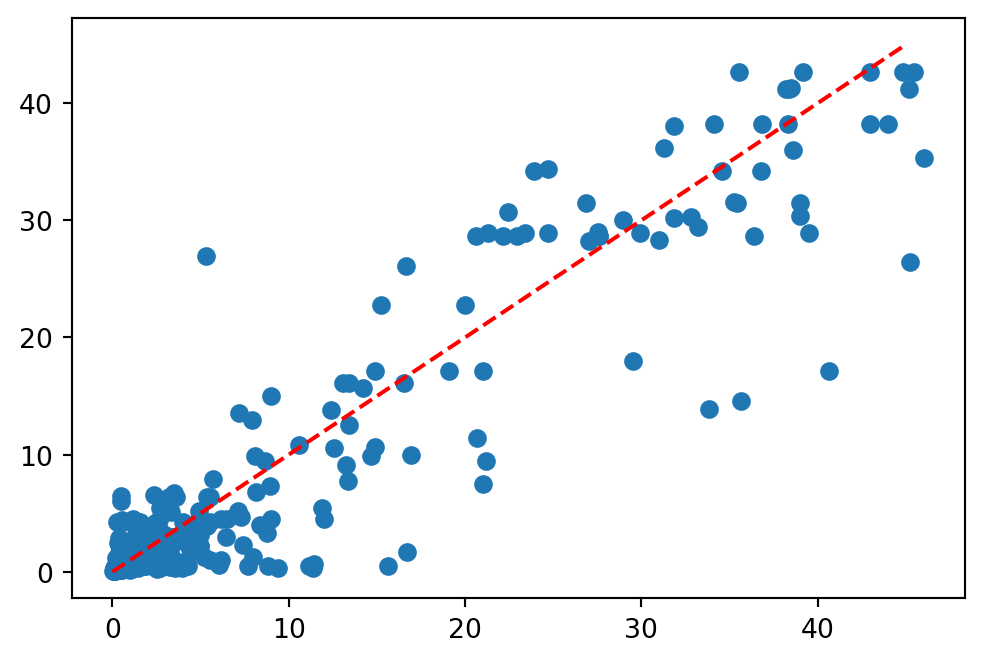

In [449]:
for i, (train_mask, test_mask) in enumerate(make_cv_splits(df, 5)):
    fe = BagOfKmersFeatureExtractor().build(df.loc[train_mask])
    xtrain, ytrain = fe.transform(df.loc[train_mask])
    xtest, ytest = fe.transform(df.loc[test_mask])
    
    model = RandomForestRegressor()
    preds = model.fit(xtrain, ytrain).predict(xtest)
    
    mae = np.mean(np.abs(ytest - preds))
    mse = np.mean((ytest - preds)**2)
    print(f'fold {i} - mae: {mae:.4f} - mse: {mse:.4f}')


plt.scatter(ytest, preds)
plt.plot([0, 45], [0, 45], 'r--')
#plt.xscale('log'); plt.yscale('log')

#### classification

In [456]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [499]:
for i, (train_mask, test_mask) in enumerate(make_cv_splits(df, 5)):
    fe = BagOfKmersFeatureExtractor(classification=True).build(df.loc[train_mask])
    xtrain, ytrain = fe.transform(df.loc[train_mask])
    xtest, ytest = fe.transform(df.loc[test_mask])
    
    model = RandomForestClassifier().fit(xtrain, ytrain)
    
    preds = model.predict(xtest)
    mcc = metrics.matthews_corrcoef(ytest, preds)
    tpos = np.mean(ytest)
    ppos = np.mean(preds)
    
    probs = model.predict_proba(xtest)
    auc = metrics.roc_auc_score(ytest, probs[:, 1])
    aps = metrics.average_precision_score(ytest, probs[:, 1])
    
    print(f'fold {i} - mcc: {mcc:.4f} - auc: {auc:.4f} - aps: {aps:.4f} | test pos: {tpos:.4f} - pred pos {ppos:.4f}')

fold 0 - mcc: 0.8038 - auc: 0.9732 - aps: 0.8932 | test pos: 0.1153 - pred pos 0.1184
fold 1 - mcc: 0.8560 - auc: 0.9855 - aps: 0.9315 | test pos: 0.1137 - pred pos 0.1184
fold 2 - mcc: 0.8307 - auc: 0.9851 - aps: 0.9294 | test pos: 0.0919 - pred pos 0.1153
fold 3 - mcc: 0.8706 - auc: 0.9935 - aps: 0.9325 | test pos: 0.0935 - pred pos 0.1044
fold 4 - mcc: 0.8013 - auc: 0.9823 - aps: 0.9061 | test pos: 0.0857 - pred pos 0.1012


In [466]:
metrics.confusion_matrix(ytest, preds)

array([[557,  16],
       [  5,  64]])

In [465]:
print(metrics.classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       573
           1       0.80      0.93      0.86        69

    accuracy                           0.97       642
   macro avg       0.90      0.95      0.92       642
weighted avg       0.97      0.97      0.97       642



### TCR-stratified CV

#### Regression

In [468]:
def make_stratified_cv_splits(data):
    # a fold only contains a single tcr    
    for t in data['tcr'].unique():
        yield data['tcr'] != t, data['tcr'] == t

In [529]:
for i, (train_mask, test_mask) in enumerate(make_stratified_cv_splits(df)):
    fe = BagOfKmersFeatureExtractor().build(df.loc[train_mask])
    xtrain, ytrain = fe.transform(df.loc[train_mask])
    
    at_mask = ytrain > 5
    xtrain, ytrain = xtrain[at_mask], ytrain[at_mask]
    
    xtest, ytest = fe.transform(df.loc[test_mask])
    
    model = RandomForestRegressor()
    preds = model.fit(xtrain, ytrain).predict(xtest)
    
    tcr = df.loc[test_mask, 'tcr'].values[0]
    mae = np.mean(np.abs(ytest - preds))
    mse = np.mean((ytest - preds)**2)
    mac = ytest.mean()
    sac = ytest.std()
    print(f'fold {i} ({tcr}) - mae: {mae:.4f} - mse: {mse:.4f} - mean activation in test: {mac:.4f} - std activation in test: {sac:.4f}')

fold 0 (OT1) - mae: 11.3159 - mse: 179.0040 - mean activation in test: 22.2970 - std activation in test: 11.4601
fold 1 (B11) - mae: 13.5291 - mse: 263.1629 - mean activation in test: 19.1356 - std activation in test: 11.7151
fold 2 (B15) - mae: 19.4252 - mse: 547.7368 - mean activation in test: 25.4306 - std activation in test: 15.5563
fold 3 (B3) - mae: 16.8007 - mse: 343.4902 - mean activation in test: 3.9859 - std activation in test: 1.9885
fold 4 (F4) - mae: 16.7286 - mse: 323.5148 - mean activation in test: 4.5989 - std activation in test: 5.4015
fold 5 (E8) - mae: 5.2842 - mse: 31.9029 - mean activation in test: 2.4152 - std activation in test: 1.7810
fold 6 (B13) - mae: 5.1457 - mse: 34.5473 - mean activation in test: 3.4867 - std activation in test: 4.9710
fold 7 (H6) - mae: 7.3661 - mse: 57.2188 - mean activation in test: 2.6732 - std activation in test: 2.3223
fold 8 (G6) - mae: 14.9734 - mse: 249.7043 - mean activation in test: 0.8861 - std activation in test: 1.9982
fold 9

#### Classification

In [532]:
for i, (train_mask, test_mask) in enumerate(make_stratified_cv_splits(df)):
    tcr = df.loc[test_mask, 'tcr'].values[0]
    
    fe = BagOfKmersFeatureExtractor(classification=True).build(df.loc[train_mask])
    xtrain, ytrain = fe.transform(df.loc[train_mask])
    
    at_mask = df.loc[train_mask, 'activation'] > 5
    xtrain, ytrain = xtrain[at_mask], ytrain[at_mask]
    
    xtest, ytest = fe.transform(df.loc[test_mask])
    
    if np.all(ytest) or not np.any(ytest):
        #print(f'skipping {tcr} since all activations are in the same class')
        continue
    
    model = RandomForestClassifier().fit(xtrain, ytrain)
    
    preds = model.predict(xtest)
    acc = np.mean(ytest == preds)
    tpos = np.mean(ytest)
    ppos = np.mean(preds)
    mcc = metrics.matthews_corrcoef(ytest, preds)
    
    probs = model.predict_proba(xtest)
    auc = metrics.roc_auc_score(ytest, probs[:, 1])
    aps = metrics.average_precision_score(ytest, probs[:, 1])
    
    print(f'{tcr} | mcc: {mcc:.4f} - auc: {auc:.4f} - aps: {aps:.4f} - acc: {acc:.4f} | test pos: {tpos:.4f} - pred pos: {ppos:.4f}')

OT1 | mcc: 0.1471 - auc: 0.8951 - aps: 0.9528 - acc: 0.3856 | test pos: 0.6536 - pred pos: 0.0392
B11 | mcc: 0.0000 - auc: 0.7978 - aps: 0.8845 - acc: 0.3464 | test pos: 0.6536 - pred pos: 0.0000
B15 | mcc: 0.0000 - auc: 0.8553 - aps: 0.9026 - acc: 0.3137 | test pos: 0.6863 - pred pos: 0.0000
F4 | mcc: 0.1832 - auc: 0.7095 - aps: 0.1306 - acc: 0.5229 | test pos: 0.0588 - pred pos: 0.5229
B13 | mcc: 0.0000 - auc: 0.6781 - aps: 0.1227 - acc: 0.9542 | test pos: 0.0458 - pred pos: 0.0000
G6 | mcc: 0.0000 - auc: 0.4934 - aps: 0.0127 - acc: 0.9935 | test pos: 0.0065 - pred pos: 0.0000


## positional features classification
the features here are indicators "amino acid A at position P"

### data preparation

alignment with muscle https://www.ebi.ac.uk/Tools/msa/muscle/

In [9]:
cdr3b_aligned = pd.DataFrame({
    'cdr3b_aligned': [
        'CASS----RANY-EQYF',
        'CASSG---GTGRNTLYF',
        'CASS----RRADAEQFF',
        'CASSSLQ-GARNQAPLF',
        'CASS----ARQNSPLYF',
        'CASGDW--GAGTGQLYF',
        'CASSD---GTGH-EQYF',
        'CASSG---TAANSDYTF',
        'CASSRQG-GDNNQAPLF',
        'CAS-----GDAS-EQYF',
        'CASGD---RERD-TQYF',
        'CASSFAG-GARA-EQFF',
        'CASS----GTDT-EVFF',
        'CASGDP--GDQD-TQYF',
        'CASSIW--GDSY-EQYF',
        'CASSM---GQGASDYTF',
        'CASSR---DSNNQAPLF',
        'CASSLRG-GNNQ-APLF',
        'CASSD---GTNQ-APLF',
        'CASGT--GGSGQ--LYF',
        'CASSDGMISSSY-EQYF',
    ],
    'cdr3b': [
        'CASSRANYEQYF',
        'CASSGGTGRNTLYF',
        'CASSRRADAEQFF',
        'CASSSLQGARNQAPLF',
        'CASSARQNSPLYF',
        'CASGDWGAGTGQLYF',
        'CASSDGTGHEQYF',
        'CASSGTAANSDYTF',
        'CASSRQGGDNNQAPLF',
        'CASGDASEQYF',
        'CASGDRERDTQYF',
        'CASSFAGGARAEQFF',
        'CASSGTDTEVFF',
        'CASGDPGDQDTQYF',
        'CASSIWGDSYEQYF',
        'CASSMGQGASDYTF',
        'CASSRDSNNQAPLF',
        'CASSLRGGNNQAPLF',
        'CASSDGTNQAPLF',
        'CASGTGGSGQLYF',
        'CASSDGMISSSYEQYF',
    ]
})

In [10]:
cdr3a_aligned = pd.DataFrame({
    'cdr3a_aligned': [
        'CAA----SDNYQ-LIW',
        'CAA----GSNYQ-LIW',
        'CAASA--ASNNR-LTL',
        'CAA---GNTGYQNFYF',
        'CAA----MSNYNVLYF',
        'CALN--TNTG-K-LTF',
        'CAMRE-GTGGYK-VVF',
        'CAMRDYNQGK---LIF',
        'CAVTP-GGSNAK-LTF',
        'CALSP-SNMGYK-LTF',
        'CAVSNYGSSGNK-LIF',
        'CAVSLY-QGGRA-LIF',
        'CAVRTN-QGGRA-LIF',
        'CAMER--DMGYK-LTF',
        'CAVSAGQGGSAK-LIF',
        'CAVSARGNMGYK-LTF',
        'CAVSR-SSGSWQ-LIF',
        'CAP---GGSNAK-LTF',
        'CAARGSALGR---LHF',
        'CAVSQ--MSNYNVLYF',
        'CALSL-GNAGAK-LTF',
    ],
    'cdr3a': [
        'CAASDNYQLIW ',  # space must be there
        'CAAGSNYQLIW',
        'CAASAASNNRLTL',
        'CAAGNTGYQNFYF',
        'CAAMSNYNVLYF',
        'CALNTNTGKLTF',
        'CAMREGTGGYKVVF',
        'CAMRDYNQGKLIF',
        'CAVTPGGSNAKLTF',
        'CALSPSNMGYKLTF',
        'CAVSNYGSSGNKLIF',
        'CAVSLYQGGRALIF',
        'CAVRTNQGGRALIF',
        'CAMERDMGYKLTF',
        'CAVSAGQGGSAKLIF',
        'CAVSARGNMGYKLTF',
        'CAVSRSSGSWQLIF',
        'CAPGGSNAKLTF',
        'CAARGSALGRLHF',
        'CAVSQMSNYNVLYF',
        'CALSLGNAGAKLTF',
    ]
})


In [11]:
df = df.merge(cdr3a_aligned).merge(cdr3b_aligned)
df

,epitope,tcr,activation,cdr3b,cdr3a,cdr3a_aligned,cdr3b_aligned
0,AIINFEKL,OT1,8.78,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF
1,CIINFEKL,OT1,4.60,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF
2,DIINFEKL,OT1,21.17,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF
3,EIINFEKL,OT1,2.87,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF
4,FIINFEKL,OT1,2.90,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF
...,...,...,...,...,...,...,...
3208,SIINFEKT,B6,0.82,CASSDGMISSSYEQYF,CALSLGNAGAKLTF,CALSL-GNAGAK-LTF,CASSDGMISSSY-EQYF
3209,SIINFEKV,B6,0.60,CASSDGMISSSYEQYF,CALSLGNAGAKLTF,CALSL-GNAGAK-LTF,CASSDGMISSSY-EQYF
3210,SIINFEKW,B6,0.90,CASSDGMISSSYEQYF,CALSLGNAGAKLTF,CALSL-GNAGAK-LTF,CASSDGMISSSY-EQYF
3211,SIINFEKY,B6,1.20,CASSDGMISSSYEQYF,CALSLGNAGAKLTF,CALSL-GNAGAK-LTF,CASSDGMISSSY-EQYF


### features

In [12]:
class AminoXPos:
    def _features(self, seq):
        for i, a in enumerate(seq):
            yield f'p{i}_a{a}'

    def build(self, sequences):
        self._index = {}
        for s in sequences:
            for f in self._features(s):
                if f not in self._index:
                    self._index[f] = len(self._index)
        return self

    def transform(self, sequences):
        for s in sequences:
            vec = [0] * (len(self._index) + 1)
            for f in self._features(s):
                vec[self._index.get(f, -1)] = 1
            yield vec

            
class AminoXPosFeatureExtractor:
    def __init__(self, classification=False):
        self.cls = classification
        
    def _get_y(self, data):
        if self.cls:
            return (data['activation'].values > 15).astype(np.int32)
        else:
            return data['activation'].values
        
    def build(self, data):
        self._pep_axp = AminoXPos().build(data['epitope'])
        self._cdr3a_axp = AminoXPos().build(data['cdr3a_aligned'])
        self._cdr3b_axp = AminoXPos().build(data['cdr3b_aligned'])
        return self

    def transform(self, data):
        x = np.hstack([
            list(self._pep_axp.transform(data['epitope'])),
            list(self._cdr3a_axp.transform(data['cdr3a'])),
            list(self._cdr3b_axp.transform(data['cdr3b'])),
        ])
        
        y = self._get_y(data)
        
        return x, y

### random split CV

#### regression

In [505]:
for i, (train_mask, test_mask) in enumerate(make_cv_splits(df, 5)):
    fe = AminoXPosFeatureExtractor().build(df.loc[train_mask])
    xtrain, ytrain = fe.transform(df.loc[train_mask])
    xtest, ytest = fe.transform(df.loc[test_mask])
    
    rf = RandomForestRegressor().fit(xtrain, ytrain)
    preds = rf.predict(xtest)
    
    mae = np.mean(np.abs(ytest - preds))
    mse = np.mean((ytest - preds)**2)
    print(f'fold {i} - mae: {mae:.4f} - mse: {mse:.4f}')

fold 0 - mae: 1.4616 - mse: 13.0320
fold 1 - mae: 1.3425 - mse: 10.3092
fold 2 - mae: 1.4915 - mse: 12.8791
fold 3 - mae: 1.2906 - mse: 8.1344
fold 4 - mae: 1.5372 - mse: 13.4753


#### classification

In [507]:
for i, (train_mask, test_mask) in enumerate(make_cv_splits(df, 5)):
    fe = AminoXPosFeatureExtractor(classification=True).build(df.loc[train_mask])
    xtrain, ytrain = fe.transform(df.loc[train_mask])
    xtest, ytest = fe.transform(df.loc[test_mask])
    
    model = RandomForestClassifier().fit(xtrain, ytrain)
    
    preds = model.predict(xtest)
    mcc = metrics.matthews_corrcoef(ytest, preds)
    tpos = np.mean(ytest)
    ppos = np.mean(preds)
    
    probs = model.predict_proba(xtest)
    auc = metrics.roc_auc_score(ytest, probs[:, 1])
    aps = metrics.average_precision_score(ytest, probs[:, 1])
    
    print(f'fold {i} - mcc: {mcc:.4f} - auc: {auc:.4f} - aps: {aps:.4f} | test pos: {tpos:.4f} - pred pos {ppos:.4f}')

fold 0 - mcc: 0.8654 - auc: 0.9958 - aps: 0.9623 | test pos: 0.0903 - pred pos 0.0872
fold 1 - mcc: 0.8718 - auc: 0.9943 - aps: 0.9523 | test pos: 0.0872 - pred pos 0.0857
fold 2 - mcc: 0.8235 - auc: 0.9771 - aps: 0.9251 | test pos: 0.1168 - pred pos 0.1121
fold 3 - mcc: 0.7698 - auc: 0.9627 - aps: 0.8774 | test pos: 0.1044 - pred pos 0.1075
fold 4 - mcc: 0.8688 - auc: 0.9872 - aps: 0.9501 | test pos: 0.1028 - pred pos 0.0919


### TCR-stratified CV

#### regression

In [87]:
for i, (train_mask, test_mask) in enumerate(make_stratified_cv_splits(df)):
    fe = AminoXPosFeatureExtractor().build(df.loc[train_mask])
    xtrain, ytrain = fe.transform(df.loc[train_mask])
    xtest, ytest = fe.transform(df.loc[test_mask])
    
    rf = RandomForestRegressor().fit(xtrain, ytrain)
    preds = rf.predict(xtest)
    
    tcr = df.loc[test_mask, 'tcr'].values[0]
    mae = np.mean(np.abs(ytest - preds))
    mse = np.mean((ytest - preds)**2)
    mac = ytest.mean()
    sac = ytest.std()
    print(f'fold {i} ({tcr}) - mae: {mae:.4f} - mse: {mse:.4f} - mean activation in test: {mac:.4f} - std activation in test: {sac:.4f}')

fold 0 (OT1) - mae: 9.4854 - mse: 120.4802 - mean activation in test: 22.2970 - std activation in test: 11.4601
fold 1 (B11) - mae: 14.8848 - mse: 311.0801 - mean activation in test: 19.1356 - std activation in test: 11.7151
fold 2 (B15) - mae: 23.2480 - mse: 760.8042 - mean activation in test: 25.4306 - std activation in test: 15.5563
fold 3 (B3) - mae: 2.9858 - mse: 12.8880 - mean activation in test: 3.9859 - std activation in test: 1.9885
fold 4 (F4) - mae: 3.4362 - mse: 20.3586 - mean activation in test: 4.5989 - std activation in test: 5.4015
fold 5 (E8) - mae: 1.5394 - mse: 5.2920 - mean activation in test: 2.4152 - std activation in test: 1.7810
fold 6 (B13) - mae: 8.4321 - mse: 103.0600 - mean activation in test: 3.4867 - std activation in test: 4.9710
fold 7 (H6) - mae: 2.4426 - mse: 7.9671 - mean activation in test: 2.6732 - std activation in test: 2.3223
fold 8 (G6) - mae: 0.6510 - mse: 4.1892 - mean activation in test: 0.8861 - std activation in test: 1.9982
fold 9 (F5) - m

#### classification

In [508]:
for i, (train_mask, test_mask) in enumerate(make_stratified_cv_splits(df)):
    tcr = df.loc[test_mask, 'tcr'].values[0]
    
    fe = AminoXPosFeatureExtractor(classification=True).build(df.loc[train_mask])
    xtrain, ytrain = fe.transform(df.loc[train_mask])
    xtest, ytest = fe.transform(df.loc[test_mask])
    
    if np.all(ytest) or not np.any(ytest):
        #print(f'skipping {tcr} since all activations are in the same class')
        continue
    
    model = RandomForestClassifier().fit(xtrain, ytrain)
    
    preds = model.predict(xtest)
    acc = np.mean(ytest == preds)
    tpos = np.mean(ytest)
    ppos = np.mean(preds)
    mcc = metrics.matthews_corrcoef(ytest, preds)
    
    probs = model.predict_proba(xtest)
    auc = metrics.roc_auc_score(ytest, probs[:, 1])
    aps = metrics.average_precision_score(ytest, probs[:, 1])
    
    print(f'{tcr} | mcc: {mcc:.4f} - auc: {auc:.4f} - aps: {aps:.4f} - acc: {acc:.4f} | test pos: {tpos:.4f} - pred pos: {ppos:.4f}')

OT1 | mcc: 0.0000 - auc: 0.9059 - aps: 0.9548 - acc: 0.3464 | test pos: 0.6536 - pred pos: 0.0000
B11 | mcc: 0.0000 - auc: 0.8692 - aps: 0.9081 - acc: 0.3464 | test pos: 0.6536 - pred pos: 0.0000
B15 | mcc: 0.0000 - auc: 0.8356 - aps: 0.9084 - acc: 0.3137 | test pos: 0.6863 - pred pos: 0.0000
F4 | mcc: 0.0000 - auc: 0.6678 - aps: 0.0926 - acc: 0.9412 | test pos: 0.0588 - pred pos: 0.0000
B13 | mcc: 0.0000 - auc: 0.5641 - aps: 0.0547 - acc: 0.9542 | test pos: 0.0458 - pred pos: 0.0000
G6 | mcc: 0.0000 - auc: 0.5099 - aps: 0.0130 - acc: 0.9935 | test pos: 0.0065 - pred pos: 0.0000


## GP with TCRdist-like kernel

In [177]:
amino_list = '-ABCDEFGHIJKLMNOPQRSTUVWXYZ'
amino_idx = {a: i for i, a in enumerate(amino_list)}


with open('data/blosum62.txt') as f:
    aminos = None
    blosum = {}
    for row in f:
        if row.startswith('#'):
            continue
        elif aminos is None:
            aminos = row.split()
        else:
            a, *scores = row.split()
            for b, s in enumerate(scores):
                blosum[a, aminos[b]] = int(s)


def tcrdist_similarity(seq1, seq2):
    return sum(
        0
        if a == 0 or b == 0
        else blosum[amino_list[a], amino_list[b]]
        if a != b
        else 8
        for a, b in zip(seq1, seq2)
    )


def encode_sequences(data):
    xx = []
    for i in range(len(data)):
        xx.append([
            amino_idx[a] for a in data.iloc[i]['epitope'].strip()
        ] + [
            amino_idx[a] for a in data.iloc[i]['cdr3a_aligned'].strip()
        ] + [
            amino_idx[a] for a in data.iloc[i]['cdr3b_aligned'].strip()
        ])
    return np.array(xx), data['activation'].values


def kernel(x1, x2):
    res = np.zeros((x1.shape[0], x2.shape[0]))
    for i in range(len(x1)):
        for j in range(len(x2)):
            res[i, j] = tcrdist_similarity(x1[i], x2[j])
    return res

### random split CV

In [178]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [179]:
for i, (train_mask, test_mask) in enumerate(make_cv_splits(df, 5)):
    xtrain, ytrain = encode_sequences(df.loc[train_mask])
    xtest, ytest = encode_sequences(df.loc[test_mask])
    
    model = SVR(kernel=kernel).fit(xtrain, ytrain)
    preds = model.predict(xtest)
    
    mae = np.mean(np.abs(ytest - preds))
    mse = np.mean((ytest - preds)**2)
    print(f'fold {i} - mae: {mae:.4f} - mse: {mse:.4f}')

fold 0 - mae: 2.4376 - mse: 31.0423
fold 1 - mae: 2.1694 - mse: 24.2386
fold 2 - mae: 2.2759 - mse: 26.2547
fold 3 - mae: 2.2776 - mse: 29.8110
fold 4 - mae: 2.7299 - mse: 34.5812


### TCR-stratified CV

In [180]:
for i, (train_mask, test_mask) in enumerate(make_stratified_cv_splits(df)):
    fe = AminoXPosFeatureExtractor().build(df.loc[train_mask])
    xtrain, ytrain = fe.transform(df.loc[train_mask])
    xtest, ytest = fe.transform(df.loc[test_mask])
    
    model = SVR(kernel=kernel).fit(xtrain, ytrain)
    preds = model.predict(xtest)
    
    tcr = df.loc[test_mask, 'tcr'].values[0]
    mae = np.mean(np.abs(ytest - preds))
    mse = np.mean((ytest - preds)**2)
    mac = ytest.mean()
    sac = ytest.std()
    print(f'fold {i} ({tcr}) - mae: {mae:.4f} - mse: {mse:.4f} - mean activation in test: {mac:.4f} - std activation in test: {sac:.4f}')

fold 0 (OT1) - mae: 11.3851 - mse: 175.0991 - mean activation in test: 22.2970 - std activation in test: 11.4601
fold 1 (B11) - mae: 11.5742 - mse: 187.7167 - mean activation in test: 19.1356 - std activation in test: 11.7151
fold 2 (B15) - mae: 20.2889 - mse: 600.9186 - mean activation in test: 25.4306 - std activation in test: 15.5563
fold 3 (B3) - mae: 4.0019 - mse: 17.8775 - mean activation in test: 3.9859 - std activation in test: 1.9885
fold 4 (F4) - mae: 9.7398 - mse: 111.3020 - mean activation in test: 4.5989 - std activation in test: 5.4015
fold 5 (E8) - mae: 1.4303 - mse: 3.0305 - mean activation in test: 2.4152 - std activation in test: 1.7810
fold 6 (B13) - mae: 3.0628 - mse: 27.6312 - mean activation in test: 3.4867 - std activation in test: 4.9710
fold 7 (H6) - mae: 3.1953 - mse: 12.3053 - mean activation in test: 2.6732 - std activation in test: 2.3223
fold 8 (G6) - mae: 1.7096 - mse: 5.2231 - mean activation in test: 0.8861 - std activation in test: 1.9982
fold 9 (F5) -

# tcr-specific model

and leave-one-out cross validation

In [670]:
def get_mutation(epi):
    diff = [
        (i, a1)
        for i, (a1, a2) in enumerate(zip(epi, 'SIINFEKL'))
        if a1 != a2
    ]
    
    return diff[0] if diff else (-1, None)


df['mut_pos'] = df['epitope'].map(lambda s: get_mutation(s)[0])
df['mut_ami'] = df['epitope'].map(lambda s: get_mutation(s)[1])
df['orig_ami'] = df['mut_pos'].map(lambda p: 'SIINFEKL'[p])
df

,epitope,tcr,activation,cdr3b,cdr3a,cdr3a_aligned,cdr3b_aligned,mut_pos,mut_ami,wild_activation,residual,orig_ami
0,AIINFEKL,OT1,8.78,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF,0,A,36.29,-27.51,S
1,CIINFEKL,OT1,4.60,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF,0,C,36.29,-31.69,S
2,DIINFEKL,OT1,21.17,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF,0,D,36.29,-15.12,S
3,EIINFEKL,OT1,2.87,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF,0,E,36.29,-33.42,S
4,FIINFEKL,OT1,2.90,CASSRANYEQYF,CAASDNYQLIW,CAA----SDNYQ-LIW,CASS----RANY-EQYF,0,F,36.29,-33.39,S
...,...,...,...,...,...,...,...,...,...,...,...,...
3208,SIINFEKT,B6,0.82,CASSDGMISSSYEQYF,CALSLGNAGAKLTF,CALSL-GNAGAK-LTF,CASSDGMISSSY-EQYF,7,T,1.49,-0.67,L
3209,SIINFEKV,B6,0.60,CASSDGMISSSYEQYF,CALSLGNAGAKLTF,CALSL-GNAGAK-LTF,CASSDGMISSSY-EQYF,7,V,1.49,-0.89,L
3210,SIINFEKW,B6,0.90,CASSDGMISSSYEQYF,CALSLGNAGAKLTF,CALSL-GNAGAK-LTF,CASSDGMISSSY-EQYF,7,W,1.49,-0.59,L
3211,SIINFEKY,B6,1.20,CASSDGMISSSYEQYF,CALSLGNAGAKLTF,CALSL-GNAGAK-LTF,CASSDGMISSSY-EQYF,7,Y,1.49,-0.29,L


In [14]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tqdm import tqdm

In [15]:
from collections import defaultdict

## features

In [671]:
# table 2 in https://www.pnas.org/content/102/18/6395
aa_factors_table = '''A 	−0.591 	−1.302 	−0.733 	1.570 	−0.146
C 	−1.343 	0.465 	−0.862 	−1.020 	−0.255
D 	1.050 	0.302 	−3.656 	−0.259 	−3.242
E 	1.357 	−1.453 	1.477 	0.113 	−0.837
F 	−1.006 	−0.590 	1.891 	−0.397 	0.412
G 	−0.384 	1.652 	1.330 	1.045 	2.064
H 	0.336 	−0.417 	−1.673 	−1.474 	−0.078
I 	−1.239 	−0.547 	2.131 	0.393 	0.816
K 	1.831 	−0.561 	0.533 	−0.277 	1.648
L 	−1.019 	−0.987 	−1.505 	1.266 	−0.912
M 	−0.663 	−1.524 	2.219 	−1.005 	1.212
N 	0.945 	0.828 	1.299 	−0.169 	0.933
P 	0.189 	2.081 	−1.628 	0.421 	−1.392
Q 	0.931 	−0.179 	−3.005 	−0.503 	−1.853
R 	1.538 	−0.055 	1.502 	0.440 	2.897
S 	−0.228 	1.399 	−4.760 	0.670 	−2.647
T 	−0.032 	0.326 	2.213 	0.908 	1.313
V 	−1.337 	−0.279 	−0.544 	1.242 	−1.262
W 	−0.595 	0.009 	0.672 	−2.128 	−0.184
Y 	0.260 	0.830 	3.097 	−0.838 	1.512'''.replace('−', '').replace(' ', '')

aa_factors = {
    aa: [float(f) for f in factors]
    for row in aa_factors_table.split('\n')
    for aa, *factors in [row.split('\t')]
}

aa_facs = pd.DataFrame(aa_factors)
aa_facs['feature_category'] = 'factors'
aa_facs['feature'] = [f'factor{i}' for i in range(len(aa_facs))]
aa_facs = aa_facs.set_index(['feature_category', 'feature']).T

In [672]:
blosum_str = '''#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
#  Downloaded from https://www.ncbi.nlm.nih.gov/Class/FieldGuide/BLOSUM62.txt 25/11/2020
   A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  B  Z  X  *
A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0 -2 -1  0 -4 
R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3 -1  0 -1 -4 
N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  3  0 -1 -4 
D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  4  1 -1 -4 
C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1 -3 -3 -2 -4 
Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0  3 -1 -4 
E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  1  4 -1 -4 
G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3 -1 -2 -1 -4 
H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0  0 -1 -4 
I -1 -3 -3 -3 -1 -3 -3 -4 -3  4  2 -3  1  0 -3 -2 -1 -3 -1  3 -3 -3 -1 -4 
L -1 -2 -3 -4 -1 -2 -3 -4 -3  2  4 -2  2  0 -3 -2 -1 -2 -1  1 -4 -3 -1 -4 
K -1  2  0 -1 -3  1  1 -2 -1 -3 -2  5 -1 -3 -1  0 -1 -3 -2 -2  0  1 -1 -4 
M -1 -1 -2 -3 -1  0 -2 -3 -2  1  2 -1  5  0 -2 -1 -1 -1 -1  1 -3 -1 -1 -4 
F -2 -3 -3 -3 -2 -3 -3 -3 -1  0  0 -3  0  6 -4 -2 -2  1  3 -1 -3 -3 -1 -4 
P -1 -2 -2 -1 -3 -1 -1 -2 -2 -3 -3 -1 -2 -4  7 -1 -1 -4 -3 -2 -2 -1 -2 -4 
S  1 -1  1  0 -1  0  0  0 -1 -2 -2  0 -1 -2 -1  4  1 -3 -2 -2  0  0  0 -4 
T  0 -1  0 -1 -1 -1 -1 -2 -2 -1 -1 -1 -1 -2 -1  1  5 -2 -2  0 -1 -1  0 -4 
W -3 -3 -4 -4 -2 -2 -3 -2 -2 -3 -2 -3 -1  1 -4 -3 -2 11  2 -3 -4 -3 -2 -4 
Y -2 -2 -2 -3 -2 -1 -2 -3  2 -1 -1 -2 -1  3 -3 -2 -2  2  7 -1 -3 -2 -1 -4 
V  0 -3 -3 -3 -1 -2 -2 -3 -3  3  1 -2  1 -1 -2 -2  0 -3 -1  4 -3 -2 -1 -4 
B -2 -1  3  4 -3  0  1 -1  0 -3 -4  0 -3 -3 -2  0 -1 -4 -3 -3  4  1 -1 -4 
Z -1  0  0  1 -3  3  4 -2  0 -3 -3  1 -1 -3 -1  0 -1 -3 -2 -2  1  4 -1 -4 
X  0 -1 -1 -1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2  0  0 -2 -1 -1 -1 -1 -1 -4 
* -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4  1 '''

aminos = None
blosum = {}
for row in blosum_str.split('\n'):
    if row.startswith('#'):
        continue
    elif aminos is None:
        aminos = row.split()
    else:
        a, *scores = row.split()
        blosum[a] = [int(s) for s in scores]
        
bs = pd.DataFrame(blosum)
bs['feature_category'] = 'blosum'
bs['feature'] = [f'blosum{i}' for i in range(len(bs))]
bs = bs.set_index(['feature_category', 'feature']).T

In [673]:
# https://en.wikipedia.org/wiki/Amino_acid
amino_props = '''Alanine 	Ala 	A 	Aliphatic 	Nonpolar 	Neutral 	1.8 			89.094 	8.76 	GCN
Arginine 	Arg 	R 	Basic 	Basic polar 	Positive 	−4.5 			174.203 	5.78 	MGR, CGY (coding codons can also be expressed by: CGN, AGR)
Asparagine 	Asn 	N 	Amide 	Polar 	Neutral 	−3.5 			132.119 	3.93 	AAY
Aspartic acid 	Asp 	D 	Acid 	Acidic polar 	Negative 	−3.5 			133.104 	5.49 	GAY
Cysteine 	Cys 	C 	Sulfuric 	Nonpolar 	Neutral 	2.5 	250 	0.3 	121.154 	1.38 	UGY
Glutamine 	Gln 	Q 	Amide 	Polar 	Neutral 	−3.5 			146.146 	3.9 	CAR
Glutamic acid 	Glu 	E 	Acid 	Acidic polar 	Negative 	−3.5 			147.131 	6.32 	GAR
Glycine 	Gly 	G 	Aliphatic 	Nonpolar 	Neutral 	−0.4 			75.067 	7.03 	GGN
Histidine 	His 	H 	Basic aromatic 	Basic polar 	Positive, 10% Neutral, 90% 	−3.2 	211 	5.9 	155.156 	2.26 	CAY
Isoleucine 	Ile 	I 	Aliphatic 	Nonpolar 	Neutral 	4.5 			131.175 	5.49 	AUH
Leucine 	Leu 	L 	Aliphatic 	Nonpolar 	Neutral 	3.8 			131.175 	9.68 	YUR, CUY (coding codons can also be expressed by: CUN, UUR)
Lysine 	Lys 	K 	Basic 	Basic polar 	Positive 	−3.9 			146.189 	5.19 	AAR
Methionine 	Met 	M 	Sulfuric 	Nonpolar 	Neutral 	1.9 			149.208 	2.32 	AUG
Phenylalanine 	Phe 	F 	Aromatic 	Nonpolar 	Neutral 	2.8 	257, 206, 188 	0.2, 9.3, 60.0 	165.192 	3.87 	UUY
Proline 	Pro 	P 	Cyclic 	Nonpolar 	Neutral 	−1.6 			115.132 	5.02 	CCN
Serine 	Ser 	S 	Hydroxylic 	Polar 	Neutral 	−0.8 			105.093 	7.14 	UCN, AGY
Threonine 	Thr 	T 	Hydroxylic 	Polar 	Neutral 	−0.7 			119.119 	5.53 	ACN
Tryptophan 	Trp 	W 	Aromatic 	Nonpolar 	Neutral 	−0.9 	280, 219 	5.6, 47.0 	204.228 	1.25 	UGG
Tyrosine 	Tyr 	Y 	Aromatic 	Polar 	Neutral 	−1.3 	274, 222, 193 	1.4, 8.0, 48.0 	181.191 	2.91 	UAY
Valine 	Val 	V 	Aliphatic 	Nonpolar 	Neutral 	4.2 			117.148 	6.73 	GUN'''.replace('−', '-')


aa_props = pd.DataFrame([
    [q.strip() for q in x.split('\t')]
    for x in amino_props.split('\n')
]).drop(columns=[0, 1, 7, 8, 11]).rename(columns={
    2: 'aa', 3: 'class', 4: 'polarity', 5: 'charge', 6: 'hydropathy', 9: 'mass', 10: 'abundance'
}).set_index('aa')

for col in ['hydropathy', 'mass', 'abundance']:
    aa_props[col] = aa_props[col].astype(np.float64)

aa_props = pd.get_dummies(aa_props)
aa_props = aa_props.T.reset_index().rename(columns={'index': 'feature'})
aa_props['feature_category'] = 'chem'
aa_props = aa_props.set_index(['feature_category', 'feature']).T

In [674]:
def make_1hot(i, n):
    res = [0] * n
    res[i] = 1
    return res

aa_1hot = {a: make_1hot(i, 20) for i, a in enumerate('ACDEFGHIKLMNPQRSTVWY')}
aa1h = pd.DataFrame(aa_1hot)
aa1h['feature_category'] = 'one_hot'
aa1h['feature'] = [f'is_{a}' for a in 'ACDEFGHIKLMNPQRSTVWY']
aa1h = aa1h.set_index(['feature_category', 'feature']).T

In [675]:
aa_features = pd.concat([aa_facs, bs, aa_props, aa1h], axis=1)

In [770]:
aa_features

feature_category factors                                  blosum          \
feature          factor0 factor1 factor2 factor3 factor4 blosum0 blosum1   
A                  0.591   1.302   0.733   1.570   0.146       4      -1   
C                  1.343   0.465   0.862   1.020   0.255       0      -3   
D                  1.050   0.302   3.656   0.259   3.242      -2      -2   
E                  1.357   1.453   1.477   0.113   0.837      -1       0   
F                  1.006   0.590   1.891   0.397   0.412      -2      -3   
G                  0.384   1.652   1.330   1.045   2.064       0      -2   
H                  0.336   0.417   1.673   1.474   0.078      -2       0   
I                  1.239   0.547   2.131   0.393   0.816      -1      -3   
K                  1.831   0.561   0.533   0.277   1.648      -1       2   
L                  1.019   0.987   1.505   1.266   0.912      -1      -2   
M                  0.663   1.524   2.219   1.005   1.212      -1      -1   
N                  0.945   0.828   1.299   0.169   0.933      -2       0   
P                  0.189   2.081   1.628   0.421   1.392      -1      -2   
Q                  0.931   0.179   3.005   0.503   1.853      -1       1   
R                  1.538   0.055   1.502   0.440   2.897      -1       5   
S                  0.228   1.399   4.760   0.670   2.647       1      -1   
T                  0.032   0.326   2.213   0.908   1.313       0      -1   
V                  1.337   0.279   0.544   1.242   1.262       0      -3   
W                  0.595   0.009   0.672   2.128   0.184      -3      -3   
Y                  0.260   0.830   3.097   0.838   1.512      -2      -2   
B                    NaN     NaN     NaN     NaN     NaN      -2      -1   
Z                    NaN     NaN     NaN     NaN     NaN      -1       0   
X                    NaN     NaN     NaN     NaN     NaN       0      -1   
*                    NaN     NaN     NaN     NaN     NaN      -4      -4   

feature_category                          ... one_hot                      \
feature          blosum2 blosum3 blosum4  ...    is_M is_N is_P is_Q is_R   
A                     -2      -2       0  ...     0.0  0.0  0.0  0.0  0.0   
C                     -3      -3       9  ...     0.0  0.0  0.0  0.0  0.0   
D                      1       6      -3  ...     0.0  0.0  0.0  0.0  0.0   
E                      0       2      -4  ...     0.0  0.0  0.0  0.0  0.0   
F                     -3      -3      -2  ...     0.0  0.0  0.0  0.0  0.0   
G                      0      -1      -3  ...     0.0  0.0  0.0  0.0  0.0   
H                      1      -1      -3  ...     0.0  0.0  0.0  0.0  0.0   
I                     -3      -3      -1  ...     0.0  0.0  0.0  0.0  0.0   
K                      0      -1      -3  ...     0.0  0.0  0.0  0.0  0.0   
L                     -3      -4      -1  ...     0.0  0.0  0.0  0.0  0.0   
M                     -2      -3      -1  ...     1.0  0.0  0.0  0.0  0.0   
N                      6       1      -3  ...     0.0  1.0  0.0  0.0  0.0   
P                     -2      -1      -3  ...     0.0  0.0  1.0  0.0  0.0   
Q                      0       0      -3  ...     0.0  0.0  0.0  1.0  0.0   
R                      0      -2      -3  ...     0.0  0.0  0.0  0.0  1.0   
S                      1       0      -1  ...     0.0  0.0  0.0  0.0  0.0   
T                      0      -1      -1  ...     0.0  0.0  0.0  0.0  0.0   
V                     -3      -3      -1  ...     0.0  0.0  0.0  0.0  0.0   
W                     -4      -4      -2  ...     0.0  0.0  0.0  0.0  0.0   
Y                     -2      -3      -2  ...     0.0  0.0  0.0  0.0  0.0   
B                      3       4      -3  ...     NaN  NaN  NaN  NaN  NaN   
Z                      0       1      -3  ...     NaN  NaN  NaN  NaN  NaN   
X                     -1      -1      -2  ...     NaN  NaN  NaN  NaN  NaN   
*                     -4      -4      -4  ...     NaN  NaN  NaN  NaN  NaN   

feature_category    

## regression

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [545]:
# compute residual
df = df.merge(
    # wild-type activation for each tcr
    df.query('mut_pos < 0')[[
        'tcr', 'activation'
    ]].rename(columns={
        'activation': 'wild_activation'
    }),
    on='tcr'
)
df['residual'] = df['activation'] - df['wild_activation']

In [907]:
def add_index_level_to_columns(df, name, value):
    # https://stackoverflow.com/a/42094658
    return pd.concat([df], keys=[value], names=[name], axis=1)


def get_features(
    fit_data,
    use_orig_props: bool,
    use_mutated_props: bool,
    use_diff_props: bool,
    use_sequence_1hot: bool,
    use_sequence_props: bool,
):
    feats = [
        # mutated position
        fit_data['mut_pos'],

        # one-hot for mutated amino acid
        fit_data['mut_ami'].apply(lambda x: aa_features.loc[x, 'one_hot']),
        
        # one-hot for original amino acid
        fit_data['orig_ami'].apply(lambda x: aa_features.loc[x, 'one_hot']),
    ]

    feats_name = 'from'
    if use_orig_props:
        # properties of the original amino acid
        feats.append(add_index_level_to_columns(
            fit_data['orig_ami'].apply(
                lambda x: aa_features.loc[x, ['factors', 'blosum', 'chem']]
            ),
            name=feats_name,
            value='orig_props'
        ))
        
    if use_mutated_props:
        # properties of the mutated amino acid
        feats.append(add_index_level_to_columns(fit_data['mut_ami'].apply(
                lambda x: aa_features.loc[x, ['factors', 'blosum', 'chem']]
            ),
            name=feats_name,
            value='mutated_props'
        ))
        
    if use_diff_props:
        # difference between properties of the mutated and original amino acids
        mut_ps = fit_data['mut_ami'].apply(
            lambda x: aa_features.loc[x, ['factors', 'blosum', 'chem']]
        )
        orig_ps = fit_data['orig_ami'].apply(
            lambda x: aa_features.loc[x, ['factors', 'blosum', 'chem']]
        )
        feats.append(add_index_level_to_columns(
            mut_ps - orig_ps,
            name=feats_name,
            value='diff_props'
        ))

    if use_sequence_1hot:
        # one-hot encoding of all amino acids in the sequence
        feats.append(add_index_level_to_columns(fit_data['epitope'].apply(
                lambda s: pd.Series(pd.concat([
                    aa_features.loc[a, 'one_hot'] for a in s.strip()
                ], axis=1).values.flatten())
            ),
            name=feats_name,
            value='sequence_1hot'
        ))

    if use_sequence_props:
        # properties of all amino acids in the sequence
        feats.append(add_index_level_to_columns(fit_data['epitope'].apply(
                lambda s: pd.Series(pd.concat([
                    aa_features.loc[a, ['factors', 'blosum', 'chem']] for a in s.strip()
                ], axis=1).values.flatten())
            ), 
            name=feats_name,
            value='sequence_props'
        ))

    res = pd.concat(feats, axis=1)
    ff.columns = [ # do this properly with a multi-index ?
        x if isinstance(x, str) else '$'.join(map(str, x))
        for x in ff.columns
    ]
    return res

In [955]:
tdf = df.query('tcr=="B15" & mut_pos>=0')
ff = get_features(tdf, True, True, True, True, True)

In [954]:
from sklearn.decomposition import PCA

In [973]:
p = PCA().fit(ff)

In [974]:
p.explained_variance_ratio_.shape

(152,)

In [969]:
n = np.sum(np.cumsum(p.explained_variance_ratio_) < 0.99)
fft = p.transform(ff)[:, :n]

In [970]:
fft.shape

(152, 38)

In [976]:
from sklearn.ensemble import GradientBoostingRegressor

In [977]:
rr = GradientBoostingRegressor().fit(fft, tdf['residual'])

In [ ]:
clf = RandomForestRegressor().fit(ff, tdf['residual'])
fdf = pd.DataFrame({
    'feat': ff.columns.tolist(),
    'imp': clf.feature_importances_,
})

fdf.sort_values('imp').tail(10)

In [920]:
def tcr_specific_model(
    use_orig_props: bool,
    use_mutated_props: bool,
    use_diff_props: bool,
    use_sequence_1hot: bool,
    use_sequence_props: bool,
    experiment_name: str,
):
    perf = []
    
    # build training features
    data = df[df['mut_pos'] >= 0]
    train_data = get_features(data, use_orig_props, use_mutated_props,
                              use_diff_props, use_sequence_1hot,
                              use_sequence_props)
    print('training on', train_data.shape[1], 'features')

    for t in ['B11', 'B15', 'OT1']:
        fit_mask = (data['tcr'] == t)
        fit_data = train_data[fit_mask]

        split = KFold(len(fit_data), shuffle=True).split(fit_data)
        for i, (train_idx, test_idx) in tqdm(enumerate(split), total=len(fit_data)):
            xtrain = fit_data.iloc[train_idx]
            xtest = fit_data.iloc[test_idx]

            ytrain = data.loc[fit_mask, 'residual'].iloc[train_idx]
            ytest = data.loc[fit_mask, 'residual'].iloc[test_idx]

            clf = RandomForestRegressor(
                # no big difference
                # criterion='mae',
                # max_features='sqrt',
                # n_jobs=-1,
                # n_estimators=250,
            ).fit(xtrain, ytrain)
            test_preds = clf.predict(xtest)

            # save performance
            pdf = data[fit_mask].iloc[test_idx][[
                'mut_pos', 'mut_ami', 'residual', 'wild_activation'
            ]]
            pdf['tcr'] = t
            pdf['fold'] = i
            pdf['pred_res'] = test_preds
            perf.append(pdf)
    
    # aggregate performance data
    pdf = pd.concat(perf)
    
    pdf['pred'] = pdf['pred_res'] + pdf['wild_activation']
    pdf['act'] = pdf['residual'] + pdf['wild_activation']
    
    pdf['abserr'] = np.abs(pdf['residual'] - pdf['pred_res'])
    pdf['err'] = pdf['pred_res'] - pdf['residual']
    
    pdf['use_mutated_props'] = use_mutated_props
    pdf['use_sequence_1hot'] = use_sequence_1hot
    pdf['use_sequence_props'] = use_sequence_props
    
    if experiment_name:
        pdf['features'] = experiment_name

    return pdf

In [929]:
ppdf = pd.concat([
    # only position and one-hot of mutated and original amino acid
    # plus properties of original and mutated amino acid
    tcr_specific_model(
        use_orig_props=True,
        use_mutated_props=True,
        use_diff_props=True,
        use_sequence_1hot=False,
        use_sequence_props=False,
        experiment_name='base',
    ),
    # adds properties of all amino acids
    tcr_specific_model(
        use_orig_props=True,
        use_mutated_props=True,
        use_diff_props=True,
        use_sequence_1hot=True,
        use_sequence_props=False,
        experiment_name='1hot_sequence',
    ),
    # adds properties of all amino acids
    tcr_specific_model(
        use_orig_props=True,
        use_mutated_props=True,
        use_diff_props=True,
        use_sequence_1hot=True,
        use_sequence_props=True,
        experiment_name='full',
    ),
])

  0%|          | 0/152 [00:00<?, ?it/s]

training on 188 features


  0%|          | 0/152 [00:00<?, ?it/s]

training on 348 features


  0%|          | 0/152 [00:00<?, ?it/s]

training on 740 features


100%|██████████| 152/152 [01:40<00:00,  1.52it/s]


In [930]:
ppdf

,mut_pos,mut_ami,residual,wild_activation,tcr,fold,pred_res,pred,act,abserr,err,use_mutated_props,use_sequence_1hot,use_sequence_props,features
213,3,E,-29.58,34.38,B11,0,-29.6896,4.6904,4.80,0.1096,-0.1096,True,False,False,base
279,6,Q,-15.88,34.38,B11,1,-12.3508,22.0292,18.50,3.5292,3.5292,True,False,False,base
267,6,A,-18.13,34.38,B11,2,-16.3299,18.0501,16.25,1.8001,1.8001,True,False,False,base
276,6,M,-19.50,34.38,B11,3,-17.1463,17.2337,14.88,2.3537,2.3537,True,False,False,base
217,3,I,-29.55,34.38,B11,4,-32.2972,2.0828,4.83,2.7472,-2.7472,True,False,False,base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0,K,-23.04,36.29,OT1,147,-22.3433,13.9467,13.25,0.6967,0.6967,True,True,True,full
131,6,W,-11.26,36.29,OT1,148,-12.5186,23.7714,25.03,1.2586,-1.2586,True,True,True,full
134,7,C,-11.26,36.29,OT1,149,-5.3878,30.9022,25.03,5.8722,5.8722,True,True,True,full
53,2,T,1.07,36.29,OT1,150,-5.9958,30.2942,37.36,7.0658,-7.0658,True,True,True,full


In [931]:
plt.rcParams['figure.dpi'] = 192

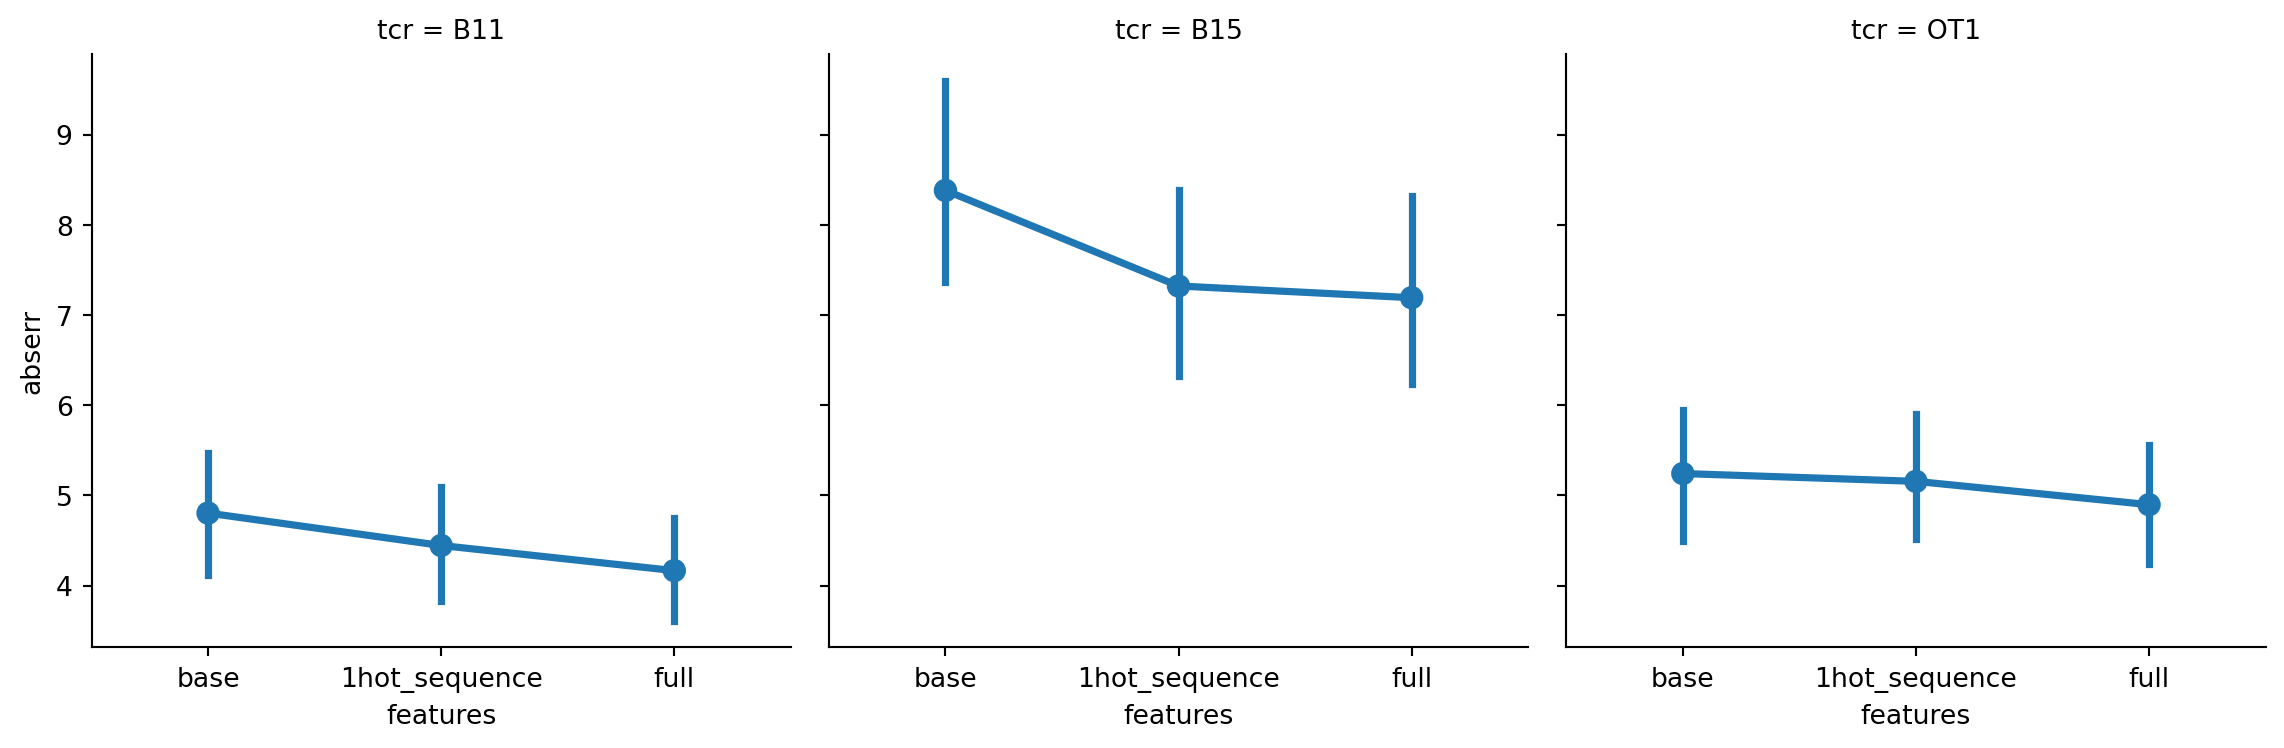

In [935]:
g = sns.FacetGrid(ppdf, col='tcr', sharey=True, sharex=True, height=4)
#g.map(sns.violinplot, 'feats', 'abserr', color='C1')
g.map(sns.pointplot, 'features', 'abserr', order=['base', '1hot_sequence', 'full'])
plt.savefig('/tmp/feature_comparison.pdf')

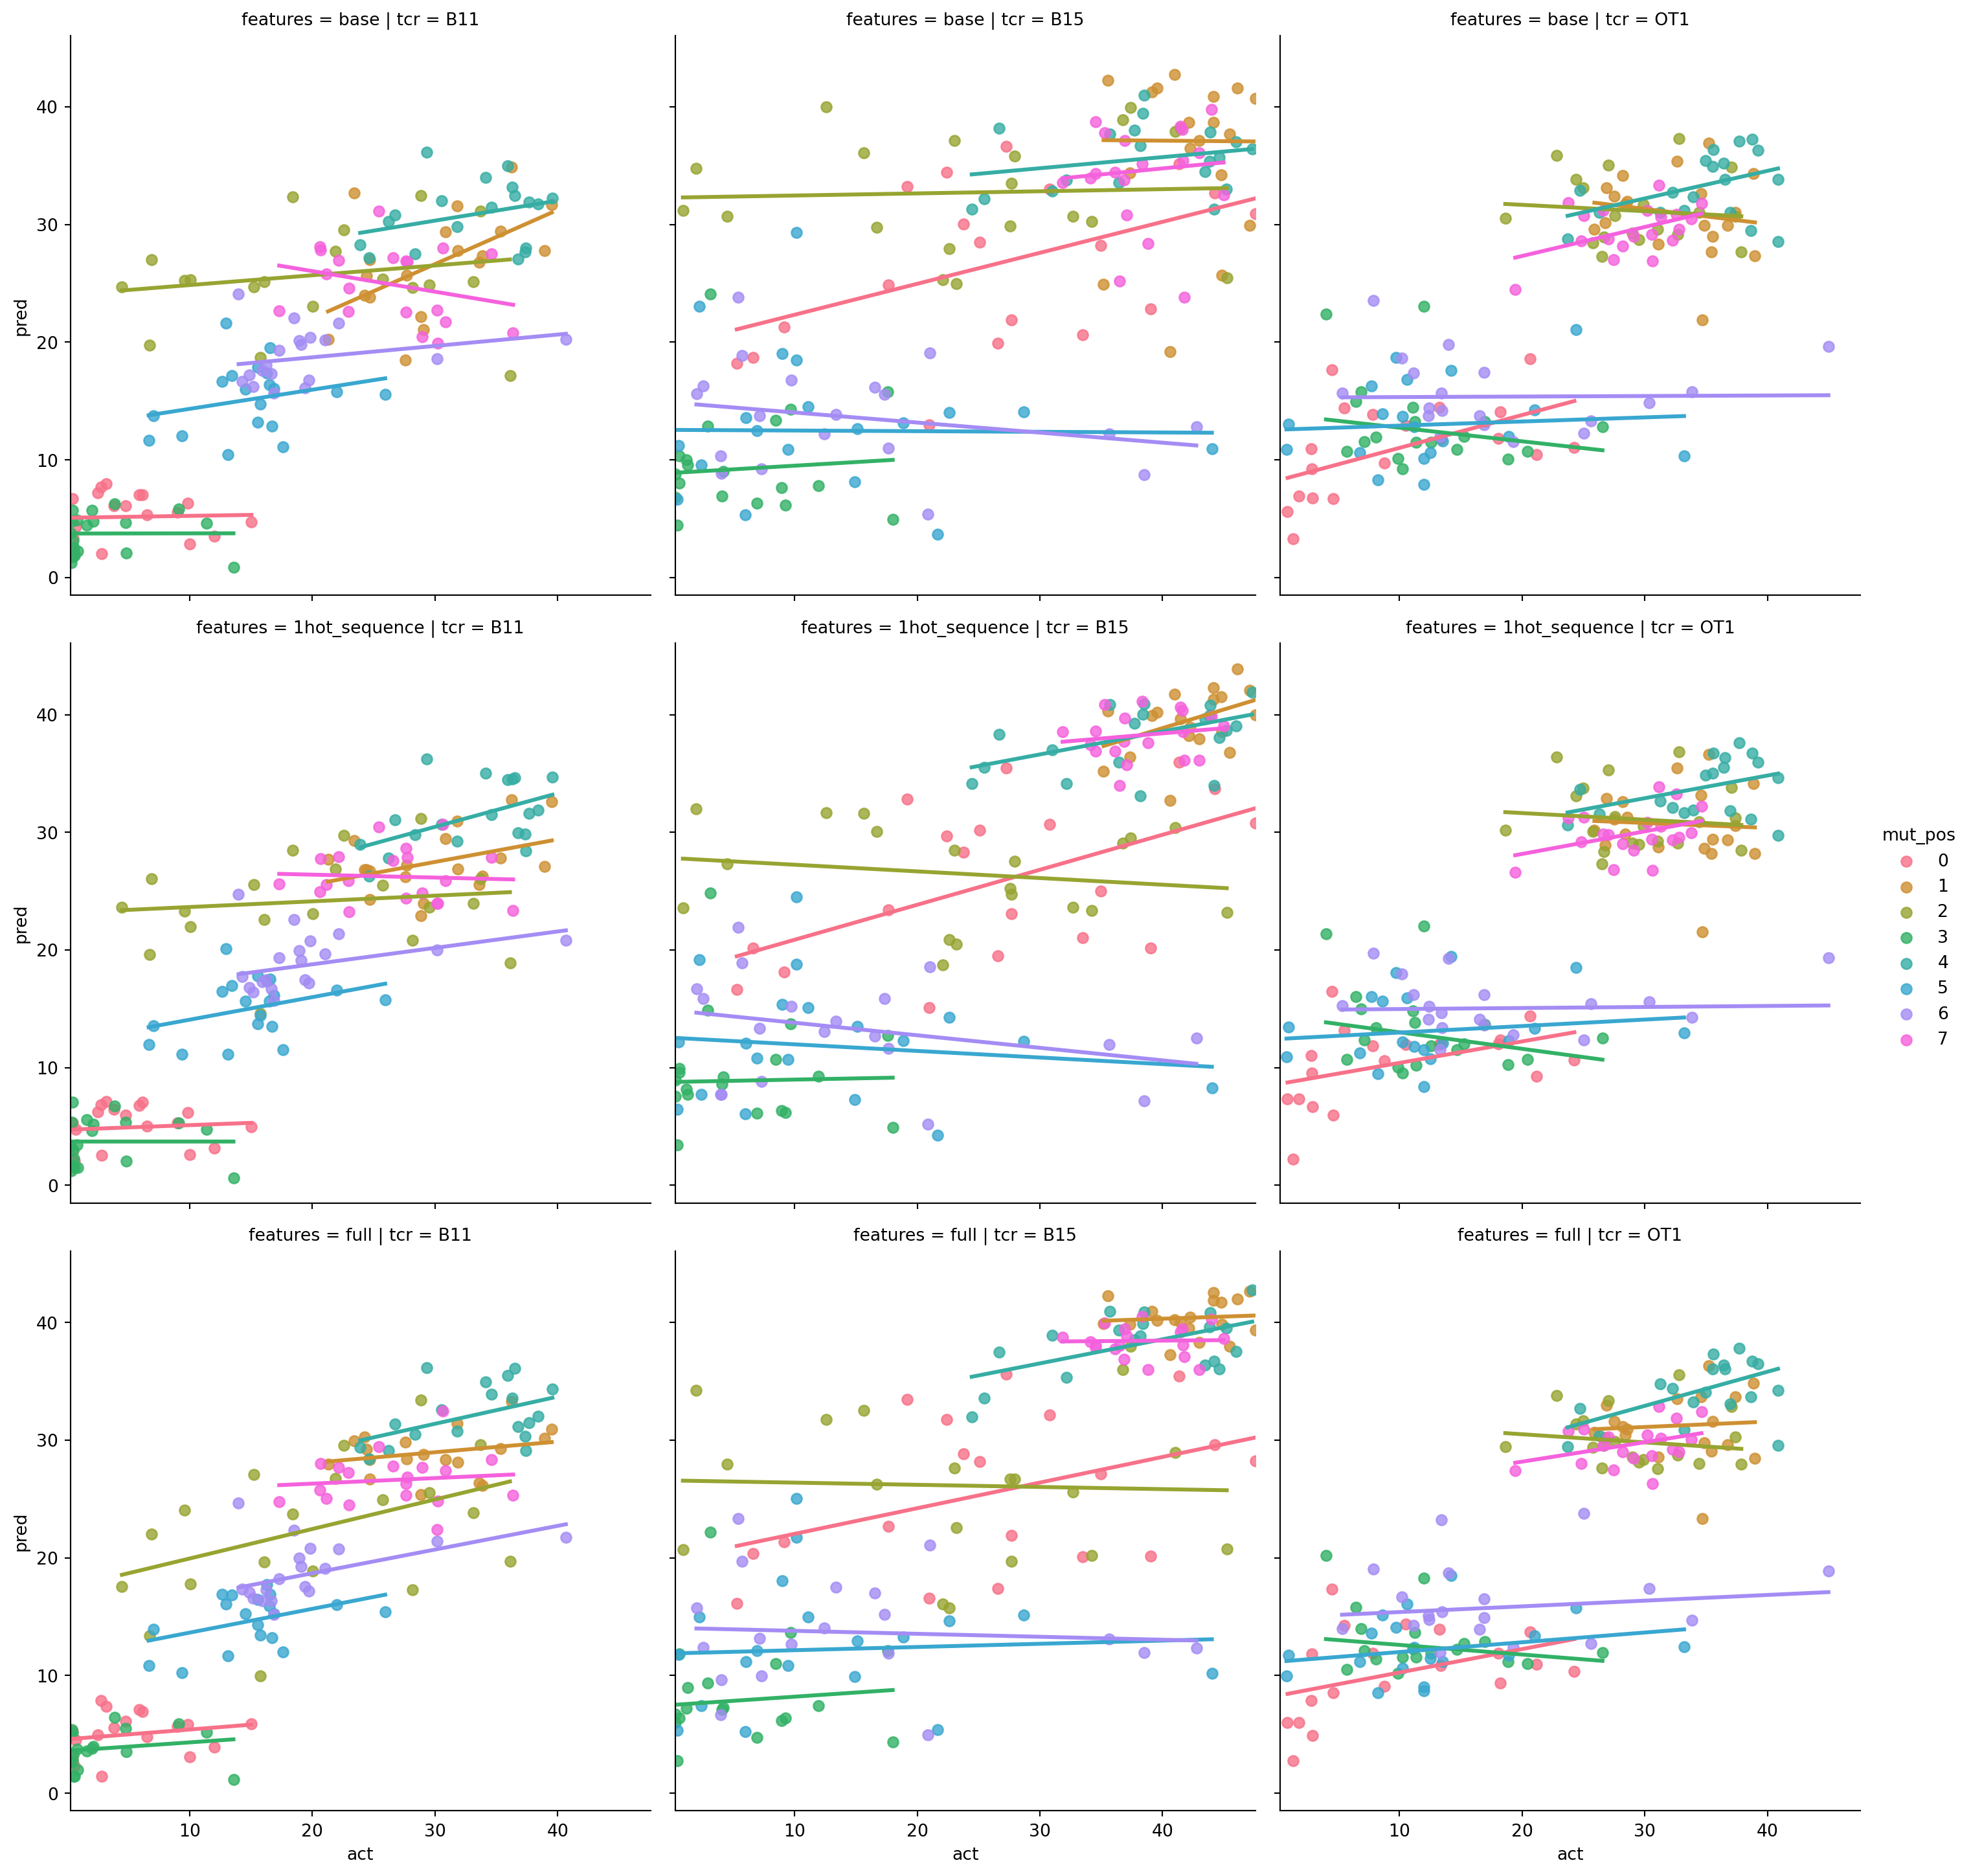

In [933]:
sns.lmplot(
    x='act', y='pred', hue='mut_pos',
    row='features', col='tcr',
    ci=None, robust=True,
    sharex=True, sharey=True,
    palette='husl',
    data=ppdf
)

In [934]:
g = sns.FacetGrid(ppdf, col='tcr', row='feats', sharey=True, sharex=True, height=4, hue_order=range(8))
g.map(sns.scatterplot, 'act', 'pred', 'mut_pos')
g.map(sns.regplot, 'act', 'pred', scatter=False)
g.set_axis_labels('Activation', 'Predicted activation')
g.add_legend()
plt.savefig('/tmp/tcr_specific_activations.pdf')

KeyError: 'feats'

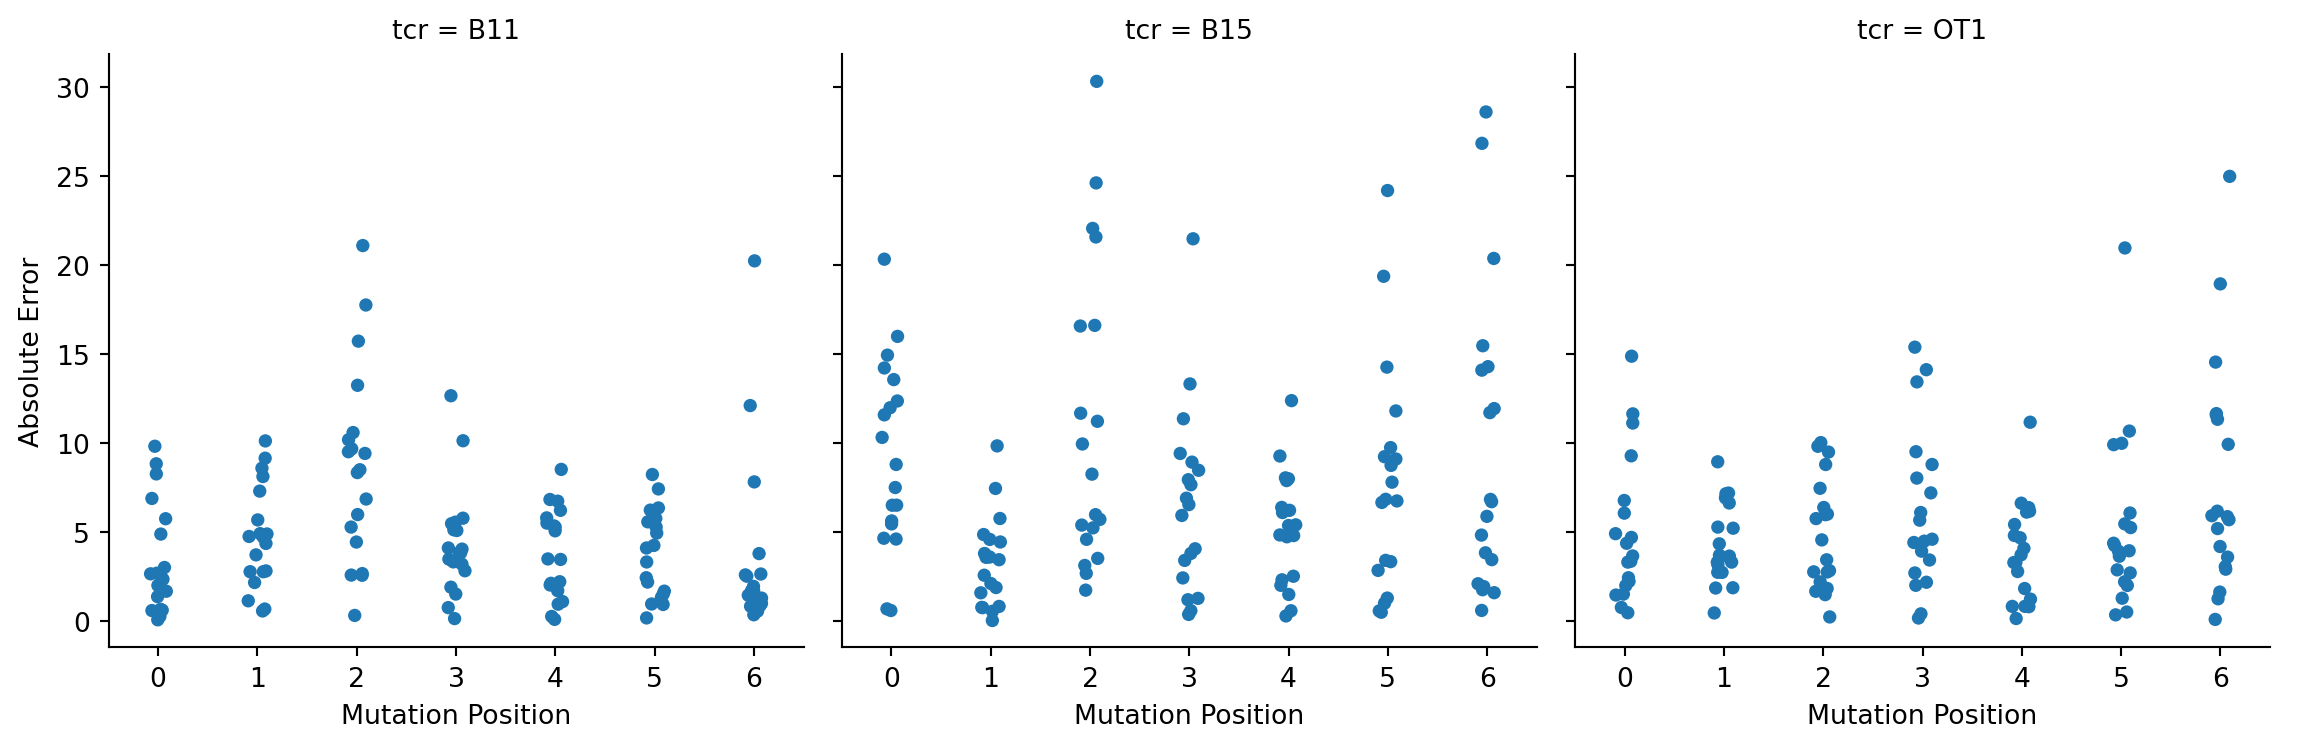

In [282]:
g = sns.FacetGrid(pdf, col='tcr', sharey=True, height=4)
g.map(sns.stripplot, 'mut_pos', 'abserr', order=range(7))
g.set_axis_labels('Mutation Position', 'Absolute Error')
g.add_legend()
plt.savefig('/tmp/tcr_specific_err_by_pos.pdf')

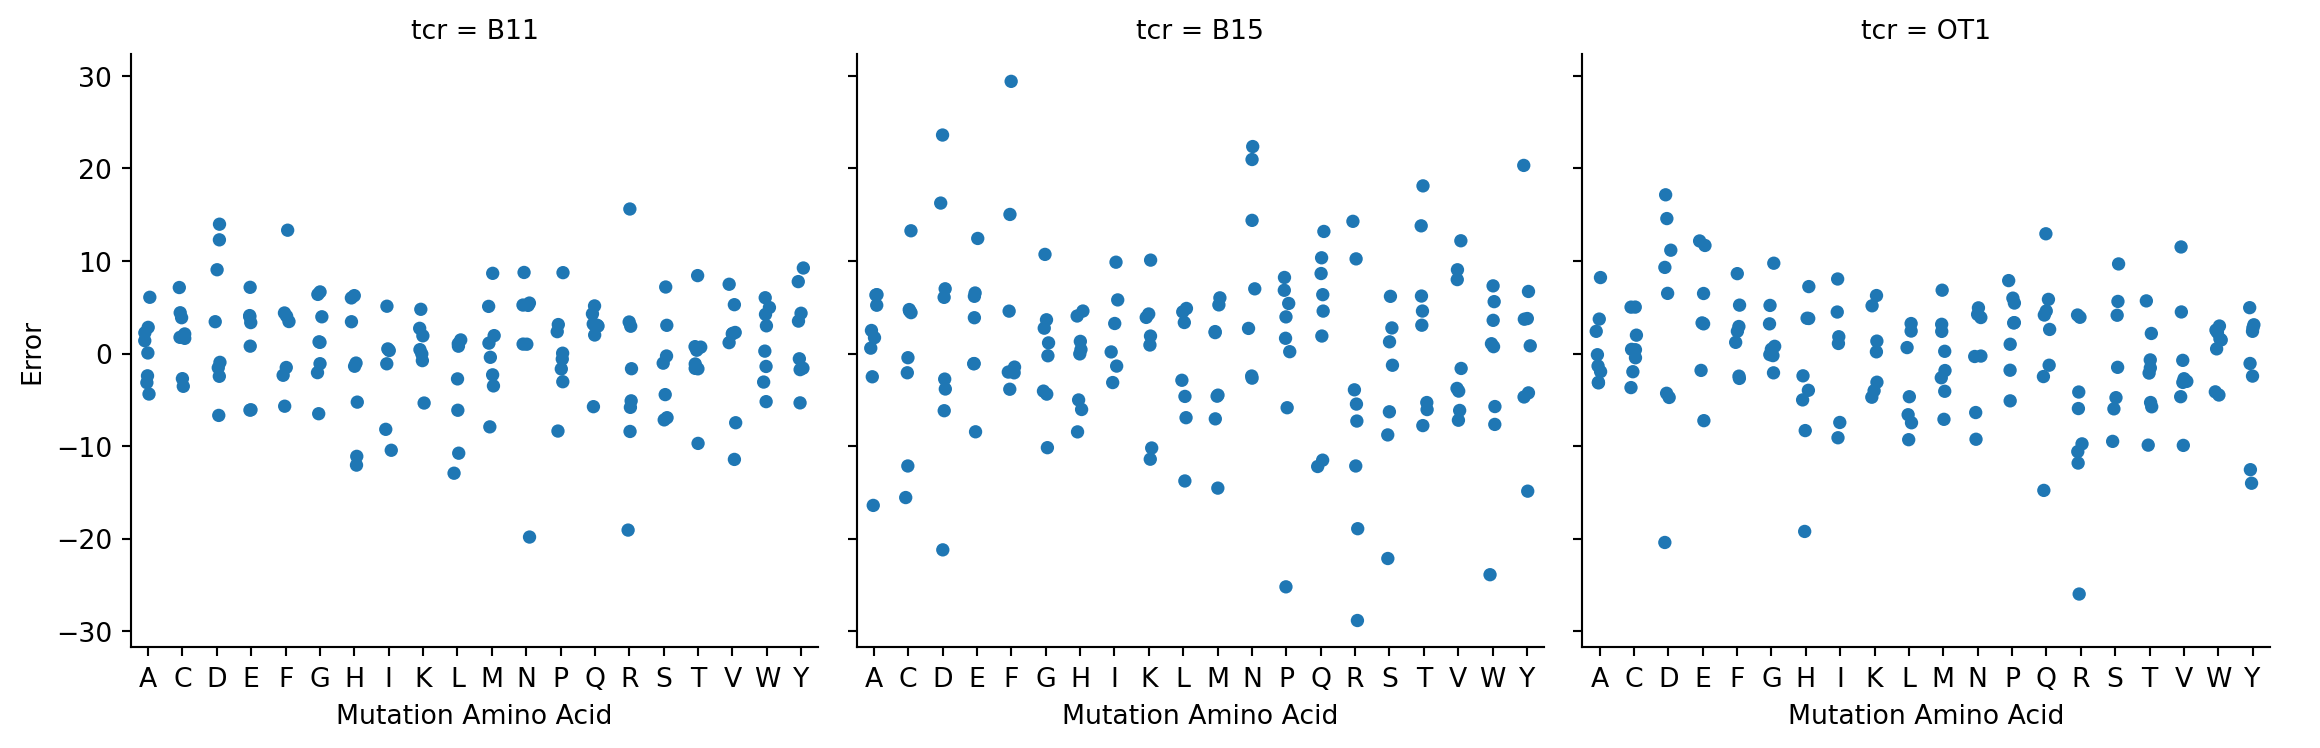

In [158]:
g = sns.FacetGrid(pdf, col='tcr', sharey=True, height=4)
g.map(sns.stripplot, 'mut_ami', 'err', order=sorted(pdf['mut_ami'].unique()))
g.set_axis_labels('Mutation Amino Acid', 'Error')
g.add_legend()
plt.savefig('/tmp/tcr_specific_err_by_aa.pdf')

## classification

In [543]:
perf = []
for t in ['B11', 'B15', 'OT1']:
    tcr_data = df.loc[df['tcr'] == t]
    
    mean_act = tcr_data['activation'].mean()
    wild_mask = tcr_data['mut_pos'] < 0
    wild_act = tcr_data[wild_mask].iloc[0]['activation']
    tcr_data['bin'] = tcr_data['activation'] > 15
    
    fit_data = pd.get_dummies(tcr_data.loc[~wild_mask, ['mut_pos', 'mut_ami', 'bin']])
    for i, (train_idx, test_idx) in tqdm(enumerate(KFold(len(fit_data), shuffle=True).split(fit_data))):
        xtrain = fit_data.iloc[train_idx].drop(columns=['bin'])
        ytrain = fit_data.iloc[train_idx]['bin']
        
        xtest = fit_data.iloc[test_idx].drop(columns=['bin'])
        ytest = fit_data.iloc[test_idx]['bin']
        
        clf = RandomForestClassifier().fit(xtrain, ytrain)
        test_preds = clf.predict(xtest)
        test_probs = clf.predict_proba(xtest)[:, 1]

        pdf = tcr_data[~wild_mask].iloc[test_idx][['mut_pos', 'mut_ami', 'bin']]
        pdf['tcr'] = t
        pdf['fold'] = i
        pdf['pred'] = test_preds
        pdf['prob'] = test_probs
        perf.append(pdf)

/home/edo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
152it [00:17,  8.75it/s]
/home/edo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
152it [00:18,  8.35it/s]
/home/edo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [544]:
pdf = pd.concat(perf)
pdf

,mut_pos,mut_ami,bin,tcr,fold,pred,prob
255,5,K,True,B11,0,True,0.81
227,3,W,False,B11,1,True,0.70
175,1,E,True,B11,2,True,0.69
198,2,K,True,B11,3,True,0.75
260,5,Q,True,B11,4,True,0.81
...,...,...,...,...,...,...,...
91,4,T,True,OT1,147,True,0.75
6,0,H,True,OT1,148,False,0.37
9,0,L,False,OT1,149,False,0.41
131,6,W,True,OT1,150,False,0.39


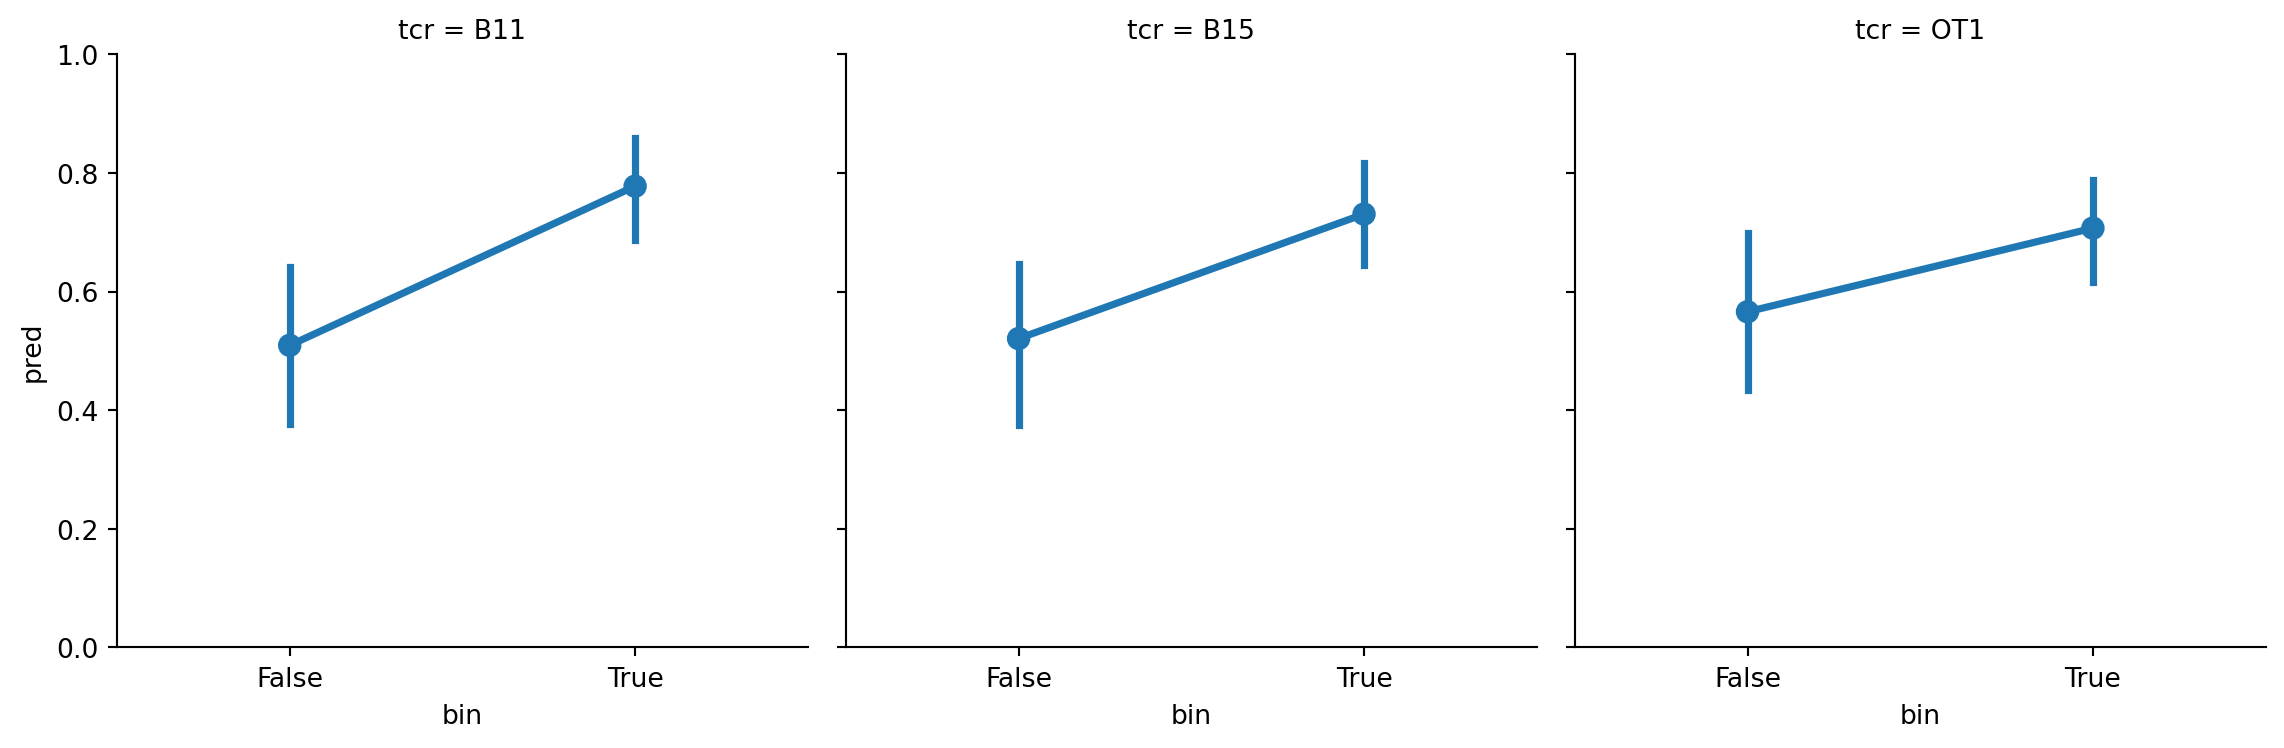

In [593]:
g = sns.FacetGrid(pdf, col='tcr', sharey=True, height=4, ylim=(0, 1))
g.map(sns.pointplot, 'bin', 'pred', order=[False, True])

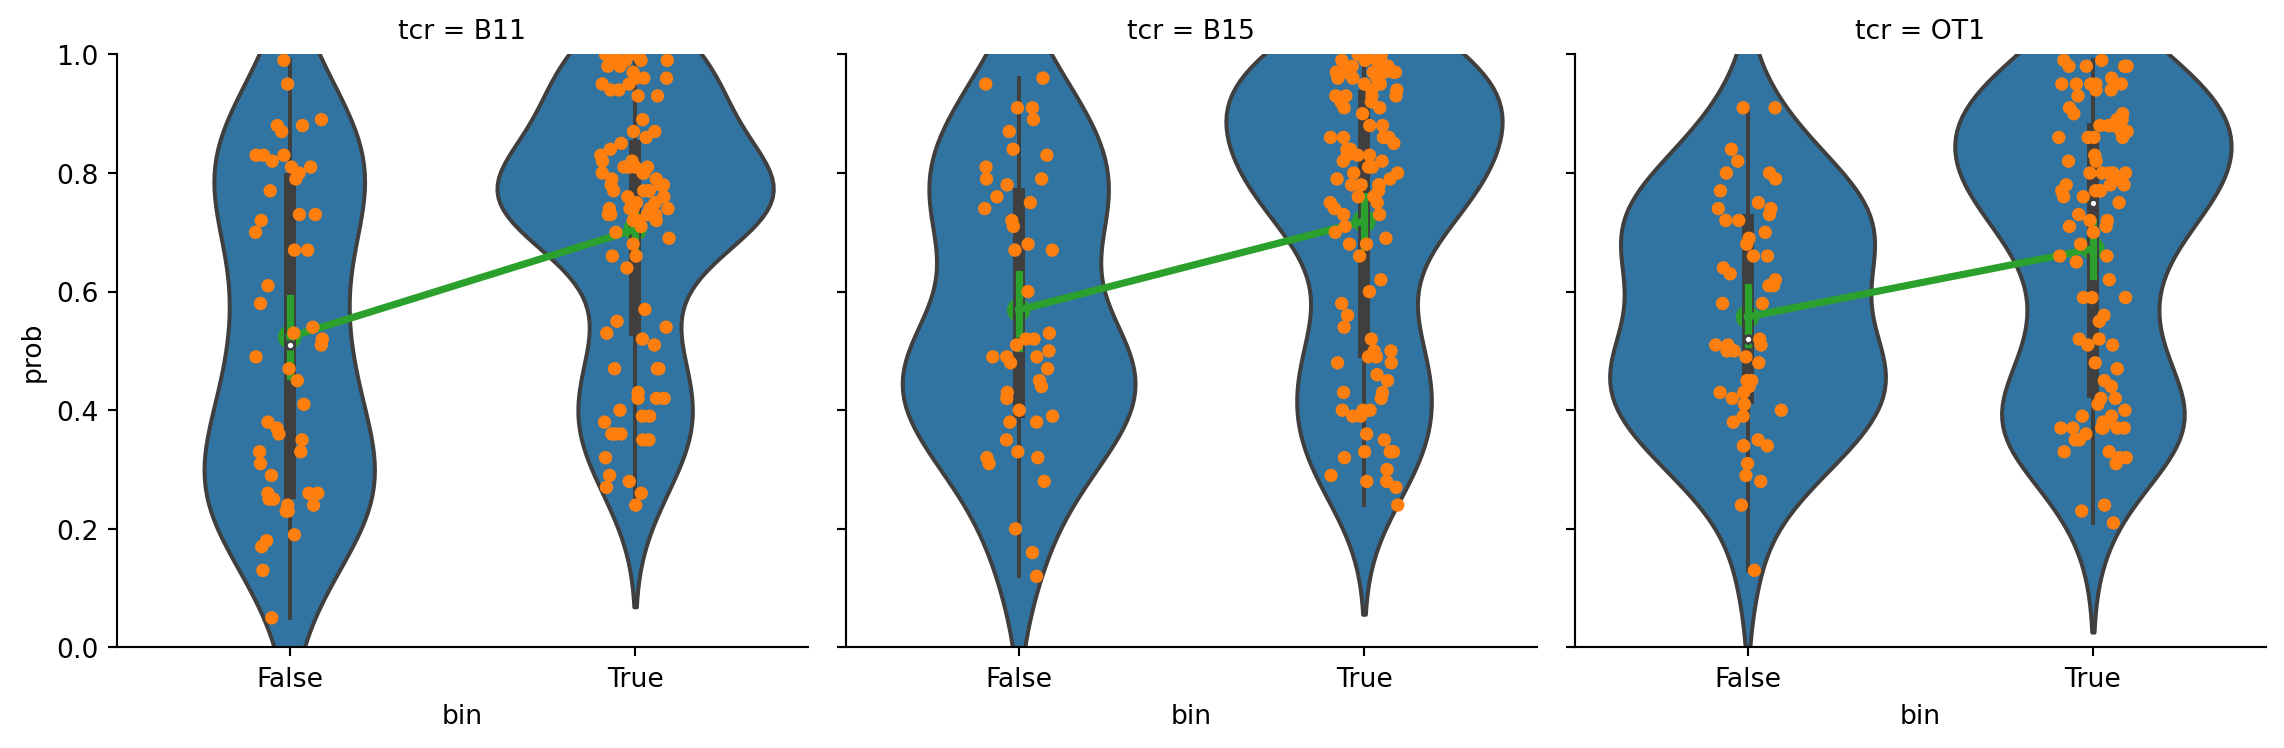

In [589]:
g = sns.FacetGrid(pdf, col='tcr', sharey=True, height=4, ylim=(0, 1))
g.map(sns.violinplot, 'bin', 'prob', order=[False, True])
g.map(sns.stripplot, 'bin', 'prob', order=[False, True], color='C1')
g.map(sns.pointplot, 'bin', 'prob', order=[False, True], color='C2')
plt.savefig('/tmp/tcr_specific_binary.pdf')

# frequentist approach: interactions in the features and group sparsity

In [192]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import KFold
from tqdm.auto import tqdm, trange
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

from group_lasso import GroupLasso  # https://github.com/yngvem/group-lasso

np.random.seed(0)
GroupLasso.LOG_LOSSES = True

In [193]:
df = pd.read_excel('data/SIINFEKL TCRs N4 Y3 T4 reactivity.xlsx')
df = df.T.drop(columns=[2, 3])[1:]
df.columns = [
    'CDR3 alpha', 'CDR3 beta',
    'N4 repl1', 'N4 repl2',
    'Y3 repl1', 'Y3 repl2',
    'T4 repl1', 'T4 repl2'
]
df.head()

,CDR3 alpha,CDR3 beta,N4 repl1,N4 repl2,Y3 repl1,Y3 repl2,T4 repl1,T4 repl2
B2,CAVSQMSNYNVLYF,CASGTGGSGQLYF,3.21725,3.69818,1.29353,1.09453,2.1393,2.48756
B3,CAAGNTGYQNFYF,CASSSLQGARNQAPLF,54.6171,53.2658,1.61036,1.20495,3.13063,3.63739
B5,CAVSLYQGGRALIF,CASSFAGGARAEQFF,1.23779,1.24864,0.803474,0.749186,2.36699,2.89902
B6,CALSLGNAGAKLTF,CASSDGMISSSYEQYF,1.74242,1.55303,1.02273,1.16162,2.99242,3.4596
B7,CAMERDMGYKLTF,CASGDPGDQDTQYF,1.51767,1.75676,1.28898,1.21622,3.87734,4.12682


In [194]:
AMINOS = ['-', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
AMINO_IDX = {a: i for i, a in enumerate(AMINOS)}

def interaction_features(alpha, beta, epitope):
    feats = {}
    for i, a in enumerate(alpha):
        for j, b in enumerate(epitope):
            feats[f'a{i}-e{j}-{a}-{b}'] = 1.

    for i, a in enumerate(beta):
        for j, b in enumerate(epitope):
            feats[f'b{i}-e{j}-{a}-{b}'] = 1.
    
    return feats


interaction_features('AC', 'EG', 'KL')

{'a0-e0-A-K': 1.0,
 'a0-e1-A-L': 1.0,
 'a1-e0-C-K': 1.0,
 'a1-e1-C-L': 1.0,
 'b0-e0-E-K': 1.0,
 'b0-e1-E-L': 1.0,
 'b1-e0-G-K': 1.0,
 'b1-e1-G-L': 1.0}

In [195]:
encoded_rows = []
tcr_indicators = []
for tcr_idx, row in df.reset_index().iterrows():
    for meas, epi in [('N4', 'SIINFEKL'), ('Y3', 'SIYNFEKL'), ('T4', 'SIITFEKL')]:
        feats = interaction_features(row['CDR3 alpha'], row['CDR3 beta'], epi)
        feats['y'] = np.log((row[f'{meas} repl1'] + row[f'{meas} repl2']) / 2.)
        encoded_rows.append(feats)
        tcr_indicators.append(tcr_idx)
tcr_indicators = np.array(tcr_indicators)

In [196]:
train_df = pd.DataFrame.from_records(encoded_rows).fillna(0.)
train_df

,a0-e0-C-S,a0-e1-C-I,a0-e2-C-I,a0-e3-C-N,a0-e4-C-F,a0-e5-C-E,a0-e6-C-K,a0-e7-C-L,a1-e0-A-S,a1-e1-A-I,...,a11-e4-H-F,a11-e5-H-E,a11-e6-H-K,a11-e7-H-L,a6-e2-A-Y,a7-e2-L-Y,a11-e2-H-Y,a6-e3-A-T,a7-e3-L-T,a11-e3-H-T
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
106,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [197]:
feature_matrix = train_df.drop('y', axis=1)

group_names = list(set(feature_matrix.columns.str.split('-').str[0:2].str.join('-')))
column_groups = np.array([-1] * len(feature_matrix.columns))
for i, g in enumerate(group_names):
    column_groups[feature_matrix.columns.str.contains(g)] = i
group_names[:10]

['a6-e4',
 'a8-e5',
 'b12-e5',
 'b14-e6',
 'b11-e1',
 'a12-e6',
 'b8-e0',
 'b10-e7',
 'b11-e7',
 'a5-e5']

In [199]:
class StratifiedCv:
    def __init__(self, folds):
        self._folds = folds
    
    def split(self, tcr_indicator, data_x, data_y):
        # tcr_indicator indicates which tcr each observation belongs to
        if data_y.dtype == np.int32:
            yield from self._classification_split(tcr_indicator, data_x, data_y)
        else:
            yield from self._regression_split(tcr_indicator, data_x, data_y)

    def _regression_split(self, tcr_indicator, data_x, data_y):
        # make sure samples from the same TCR are all in the same
        # set (train/vali) at all folds
        
        tcrs = list(set(tcr_indicator))
        random.shuffle(tcrs)
        
        for i in range(self._folds):
            vali_mask = None
            for t in tcrs[i::self._folds]:
                if vali_mask is not None:
                    vali_mask = vali_mask | (tcr_indicator == t)
                else:
                    vali_mask = (tcr_indicator == t)
            
            yield ~vali_mask, vali_mask
    
    def _classification_split(self, tcr_indicator, data_x, data_y):
        # in addition to TCR segretaion, make sure that the
        # ratio of positive/negative samples is similar
        
        # TODO
        yield from self._regression_split(tcr_indicator, data_x, data_y)

In [200]:
# test straitified cv
all_vali_idx = None
for train_idx, vali_idx in StratifiedCv(5).split(tcr_indicators, feature_matrix, train_df['y']):
    assert not any(train_idx & vali_idx)
    if all_vali_idx is None:
        all_vali_idx = vali_idx
    else:
        assert not any(all_vali_idx & vali_idx)
        all_vali_idx = all_vali_idx | vali_idx
print('pass')

pass


In [201]:
def repeated_cv(repetitions, folds, model_fn, eval_fn, tcr_ind, data_x, data_y, verbose=False):
    res = []
    reps = trange(repetitions, leave=False) if verbose else range(repetitions)
    for i in reps:
        split_iter = StratifiedCv(folds).split(tcr_ind, data_x, data_y)
            
        if verbose:
            splits = tqdm(enumerate(split_iter), total=folds, leave=False)
        else:
            splits = enumerate(split_iter)

        for j, (train_idx, test_idx) in splits:
            model = model_fn()
            model.fit(data_x[train_idx], data_y[train_idx])
            score = eval_fn(model, data_x[test_idx], data_y[test_idx])
            res.append((i, j, score))

    return pd.DataFrame(res, columns=['repetition', 'fold', 'score'])

In [202]:
import warnings
warnings.filterwarnings('ignore', 'From version 0.24, get_params will raise an AttributeError if a parameter cannot be.*', FutureWarning)

5 fold cv with 32 receptor gives ~ 6 receptors per validation set

## group lasso

In [203]:
from group_lasso import LogisticGroupLasso

In [204]:
def make_model(group_reg, l1_reg):
    def get_model():
        return GroupLasso(
            groups=column_groups,
            group_reg=group_reg,
            l1_reg=l1_reg,
            frobenius_lipschitz=True,
            scale_reg=None,  # should be used for dummy variables
            subsampling_scheme=1,
            supress_warning=True,
            n_iter=10000,
            tol=1e-3,
        )
    return get_model


def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    return np.mean(np.abs(preds - y_test))


def random_search():
    best = None
    bar = tqdm(range(100))
    model = make_model(1, 1)()
    record = []
    
    for i in bar:
        group_reg = np.exp(stats.uniform(-6, 4).rvs())
        l1_reg = np.exp(stats.uniform(-6, 4).rvs())
    
        scores = repeated_cv(
            repetitions=3, folds=5,
            model_fn=make_model(group_reg, l1_reg),
            eval_fn=eval_model,
            tcr_ind=tcr_indicators,
            data_x=feature_matrix.values,
            data_y=train_df['y'].values.reshape(-1, 1),
        )
        scores['group'] = group_reg
        scores['l1'] = l1_reg
        record.append(scores)
        
        avg = scores['score'].mean()
        if best is None or avg < best[1]:
            best = (group_reg, l1_reg), avg
        
        bar.set_description(f'Curr.: {avg:.3f} - Best: {best[1]:.3f}')

    return best, pd.concat(record)


best, record = random_search()
best

((0.002607364629030569, 0.00999308327111451), 1.4074738574558245)

## hyperp. search analysis

In [92]:
#cv_df = pd.read_csv('cv-results.csv', dtype={'repetition': int, 'fold': int, 'score': float, 'group': str, 'l1': str})
cv_df = pd.read_csv('stratified-cv-results.csv', dtype={'repetition': int, 'fold': int, 'score': float, 'group': str, 'l1': str})
cv_df

,repetition,fold,score,group,l1
0,0,0,1.159401,0.010977967594393578,0.05795396234620415
1,0,1,1.632046,0.010977967594393578,0.05795396234620415
2,0,2,2.269565,0.010977967594393578,0.05795396234620415
3,0,3,2.878652,0.010977967594393578,0.05795396234620415
4,0,4,1.863205,0.010977967594393578,0.05795396234620415
...,...,...,...,...,...
1995,1,5,2.954291,0.0061536612661942216,0.0019626640957335923
1996,1,6,1.054837,0.0061536612661942216,0.0019626640957335923
1997,1,7,3.736124,0.0061536612661942216,0.0019626640957335923
1998,1,8,1.857804,0.0061536612661942216,0.0019626640957335923


In [93]:
agg_cv = cv_df.groupby([
    'group', 'l1'
]).apply(lambda g: g['score'].describe()).sort_values('mean').reset_index()
agg_cv

score,group,l1,count,mean,std,min,25%,50%,75%,max
0,0.020529513874659556,0.03614284283014773,20.0,1.950365,0.652069,1.017147,1.503155,1.865824,2.390424,3.498232
1,0.0023713813968631713,0.06329876303612066,20.0,2.074727,0.858152,1.080891,1.524325,1.864829,2.224922,4.212632
2,0.00020007764867139636,0.04392117989016946,20.0,2.096926,0.824673,0.717594,1.565401,2.170618,2.550465,3.943354
3,0.0004221949036637253,0.05869824543275778,20.0,2.133541,0.803413,1.070097,1.615748,1.930566,2.585343,4.124575
4,0.00030157388470175393,0.003920573676784925,20.0,2.147557,1.500279,0.560380,0.969075,1.535597,2.975975,5.571284
...,...,...,...,...,...,...,...,...,...,...
95,0.0004818724660395451,0.0009120253940751597,20.0,3.120214,1.847878,0.835362,1.718278,2.531256,4.165484,8.111473
96,0.002132239282618331,0.0008806756232913539,20.0,3.128478,1.818109,0.726737,1.987366,2.585259,4.415759,7.251022
97,0.0005763612907103018,0.0004989574618418524,20.0,3.132727,1.832332,0.684882,1.728344,2.718234,4.382942,6.710893
98,8.495615581817958e-05,0.0011880460936852517,20.0,3.192502,2.262831,0.492276,1.666317,2.626117,3.837014,8.558397


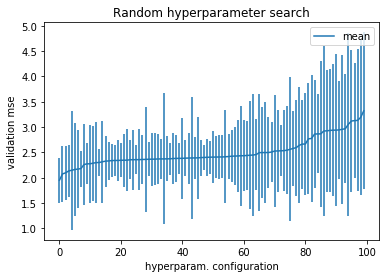

In [94]:
agg_cv.plot.line(None, 'mean', yerr=(agg_cv['mean'] - agg_cv['25%'], agg_cv['75%'] - agg_cv['mean']))
plt.ylabel('validation mse')
plt.xlabel('hyperparam. configuration')
plt.title('Random hyperparameter search')
plt.savefig('/tmp/aa.png')

In [95]:
model = GroupLasso(
    groups=column_groups,
    group_reg=float(agg_cv.iloc[0]['group']),
    l1_reg=float(agg_cv.iloc[0]['l1']),
    frobenius_lipschitz=True,
    scale_reg=None,  # should be used for dummy variables
    subsampling_scheme=1,
    supress_warning=True,
    n_iter=10000,
    tol=1e-3,
)

# split stratified by TCR
num_tcr = 3  # each tcr transformed into 6 rows
x_test, y_test = feature_matrix.values[:6*num_tcr], train_df['y'].values[:6*num_tcr]
x_train, y_train = feature_matrix.values[6*num_tcr:], train_df['y'].values[6*num_tcr:]

# random split
#train_idx = np.random.choice(len(feature_matrix), int(0.8 * len(feature_matrix)))
#x_test, y_test = feature_matrix.values[train_idx], train_df['y'].values[train_idx]
#x_train, y_train = feature_matrix.values[~train_idx], train_df['y'].values[~train_idx]

model.fit(x_train, y_train.reshape(-1, 1))

mean sq error

In [96]:
preds = model.predict(x_test).ravel()
np.mean((preds - y_test)**2)

2.951352986189613

mean abs error

In [97]:
np.mean(np.abs(preds - y_test))

1.5587508293152612

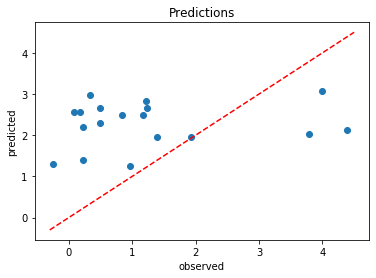

In [98]:
plt.scatter(y_test, preds)
plt.xlabel('observed')
plt.ylabel('predicted')
plt.plot([-0.3, 4.5], [-0.3, 4.5], 'r--')
plt.title('Predictions')
plt.savefig('/tmp/aa')

### selected groups

In [99]:
len(model.chosen_groups_), len(group_names)

(51, 248)

In [100]:
groups = sorted([n for i, n in enumerate(group_names) if i in model.chosen_groups_])

alpha_mat = np.zeros((df['CDR3 alpha'].str.len().max(), 9))
beta_mat = np.zeros((df['CDR3 beta'].str.len().max(), 9))
for g in groups:
    mat = alpha_mat if g[0] == 'a' else beta_mat
    chain_pos, epi_pos = g.split('-')
    mat[int(chain_pos[1:]), int(epi_pos[1:])] = 1

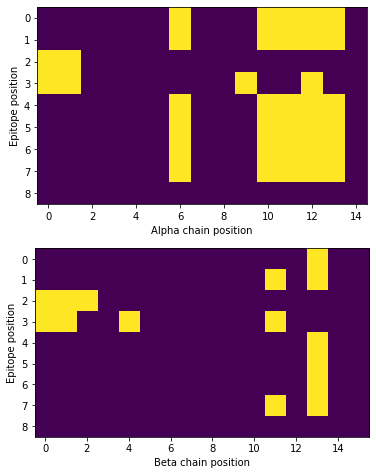

In [101]:
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.imshow(alpha_mat.T)
plt.xlabel('Alpha chain position')
plt.ylabel('Epitope position')
plt.subplot(2, 1, 2)
plt.imshow(beta_mat.T)
plt.xlabel('Beta chain position')
plt.ylabel('Epitope position')
plt.savefig('/tmp/aa')

### feature-level sparsity works

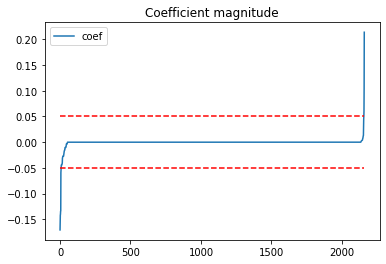

In [106]:
coeffs = model.coef_.ravel()
sorted_coeffs = sorted(zip(coeffs, feature_matrix.columns), key=lambda x: x[0])
co_df = pd.DataFrame(sorted_coeffs, columns=('coef', 'feat'))

co_df.plot.line(None, 'coef')
lim = 0.05
plt.plot([0, len(co_df)], [lim, lim], 'r--')
plt.plot([0, len(co_df)], [-lim, -lim], 'r--')

plt.title('Coefficient magnitude')
plt.savefig('/tmp/aa')

In [118]:
co_df[co_df['coef'].abs() >= lim]

,coef,feat
0,-0.170536,b13-e5-F-E
1,-0.155078,b13-e7-F-L
2,-0.141848,b13-e1-F-I
3,-0.140082,b13-e0-F-S
4,-0.134214,b13-e4-F-F
5,-0.133707,b13-e6-F-K
6,-0.059266,a12-e4-I-F
7,-0.053367,a12-e1-I-I
2156,0.050259,b1-e3-A-N
2157,0.060284,a12-e3-F-N


In [121]:
covs = co_df[co_df['coef'].abs() >= lim].to_numpy()
pd.DataFrame(np.hstack([covs[:6], covs[6:]]), columns=['Value', 'Coef.'] * 2)

,Value,Coef.,Value,Coef.
0,-0.170536,b13-e5-F-E,-0.0592658,a12-e4-I-F
1,-0.155078,b13-e7-F-L,-0.0533671,a12-e1-I-I
2,-0.141848,b13-e1-F-I,0.0502588,b1-e3-A-N
3,-0.140082,b13-e0-F-S,0.0602837,a12-e3-F-N
4,-0.134214,b13-e4-F-F,0.105098,a9-e3-K-N
5,-0.133707,b13-e6-F-K,0.21373,b4-e3-P-N


### does sparsity depend on epitope position?

In [226]:
co_df['epi_pos'] = co_df.feat.str.split('-').str[1]
aa = co_df.reset_index().groupby('epi_pos').apply(lambda g: g['coef'].describe()).sort_values('mean')
aa

coef,count,mean,std,min,25%,50%,75%,max
epi_pos,,,,,,,,
e5,216.0,0.001592,0.012360,-0.052006,-0.000582,0.000000,0.001558,0.056601
e0,216.0,0.001646,0.013352,-0.065228,-0.000362,0.000020,0.001452,0.060002
e7,216.0,0.001806,0.012274,-0.048263,-0.000374,0.000000,0.001646,0.072879
e6,216.0,0.001809,0.014580,-0.068772,-0.000526,0.000000,0.001411,0.084201
e1,216.0,0.001829,0.014912,-0.061611,-0.000349,0.000000,0.001012,0.074844
e4,216.0,0.002043,0.015418,-0.060458,-0.000564,0.000000,0.001384,0.071906
e2,432.0,0.005965,0.056220,-0.361067,-0.003157,0.000366,0.006611,0.320746
e3,432.0,0.009154,0.085852,-0.579592,-0.004741,0.000356,0.008287,0.379490


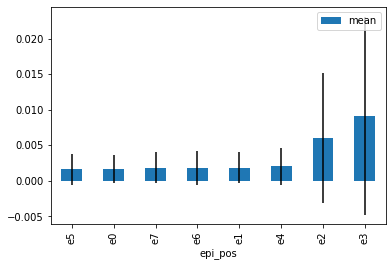

In [227]:
aa.plot.bar(None, 'mean', yerr=(aa['mean'] - aa['25%'], aa['75%'] - aa['mean']))

nope

### does sparsity depend on tcr position?

In [228]:
co_df['tcr_pos'] = co_df.feat.str.split('-').str[0]
aa = co_df.reset_index().groupby('tcr_pos').apply(lambda g: g['coef'].describe()).sort_values('mean')
aa

coef,count,mean,std,min,25%,50%,75%,max
tcr_pos,,,,,,,,
b13,50.0,-0.007875,0.031850,-0.132840,-0.004754,-0.000109,0.004461,0.046425
a12,60.0,-0.003164,0.051317,-0.303342,-0.002261,0.000000,0.010433,0.160044
b15,10.0,-0.001959,0.006125,-0.018489,-0.000608,-0.000000,-0.000000,0.002738
a13,40.0,-0.000647,0.002017,-0.006067,-0.001547,-0.000296,0.000012,0.004735
b14,30.0,0.000049,0.002224,-0.006759,0.000000,0.000008,0.000638,0.007603
a14,10.0,0.000112,0.001838,-0.002184,-0.000315,-0.000000,-0.000000,0.004915
b6,130.0,0.001132,0.053161,-0.233866,-0.001949,0.000122,0.002520,0.285168
b10,120.0,0.001478,0.020997,-0.101300,-0.000542,0.000045,0.003399,0.147955
b12,70.0,0.002335,0.034809,-0.070660,-0.000319,-0.000000,0.000790,0.275092


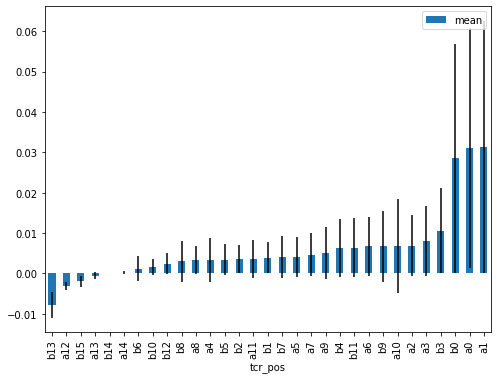

In [229]:
aa.plot.bar(None, 'mean', yerr=(aa['mean'] - aa['25%'], aa['75%'] - aa['mean']), figsize=(8, 6))

note that first positions of alpha and beta chains are always the same

In [230]:
df['CDR3 alpha'].str[0:2].unique()

array(['CA'], dtype=object)

In [231]:
df['CDR3 beta'].str[0:2].unique()

array(['CA', 'CG'], dtype=object)